# Модель прогнозирования оттока клиентов фитнес-центра

**Описание проекта**

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Если за последний месяц клиент ни разу не посетил спортзал - является индикатором оттока для фитнес-центра . Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. 



**Цель исследования**

Провести анализ и подготовить план действий по удержанию клиентов.
А именно:
   * научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
   * сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
   * проанализировать основные признаки, наиболее сильно влияющие на отток;
   * сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
   
        1. выделить целевые группы клиентов;
        2. предложить меры по снижению оттока;
        3. определить другие особенности взаимодействия с клиентами.


 **Ход исследования**
 
 1. Обзор данных.
 2. Подготовка данных и EDA.
 3. Построение модели прогнозирования оттока клиентов.
 4. Кластеризация клиентов.
 5. Общий вывод и рекомендации.

## Обзор данных

Импортируем все необходимые библиотеки. 

In [1]:
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Познакомимся с данными. Для этого создадим функцию, которая выводит общую информацию о данных, проверяет данные на пропуски и дубликаты, а также знакомит нас с основными статистическими характеристиками данных:

In [3]:
def df_info(df):
    print('Знакомство с данными')
    print('_' * 19, '\n')
    display(df.head(10))
    print()
    print('Сводная информация о данных')
    print('_' * 26, '\n')
    df.info()
    print()
    print("Проверка данных на пропуски и дубликаты")
    print('_' * 35, '\n')
    print()
    print("Доля пропусков:", display(df.isna().mean().round(2)))
    print('_' * 20, '\n')
    print()
    print("Количество дубликатов:", df.duplicated().sum()) 
    print('_' * 22, '\n')
    print()
    print("Сводка статистики")  
    print('_' * 15, '\n')
    print()
    display(df.describe())    

Посмотрим эту информацию:

In [4]:
df_info(df)

Знакомство с данными
___________________ 



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0



Сводная информация о данных
__________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Доля пропусков: None
____________________ 


Количество дубликатов: 0
______________________ 


Сводка статистики
_______________ 




,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Итак, в таблице с данными 14 столбцов и 4000 строк. Данные представлены 14 количественными переменными. 
Каждый объект в наборе данных - это информация о поведении 4000 клиентов фитнес-центра. В данных нет пропусков и дубликатов. Судя по статистикам: среднему и стандартному отклонению, можно утверждать, что данные распределены более или менее равномерно без аномально больших выбросов. 

**Описание данных**

Данные клиента за предыдущий до проверки факта оттока месяц:

- `'gender'` — пол;
- `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
- `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `'Phone'` — наличие контактного телефона;
- `'Age'` — возраст;
- `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
- `'Group_visits'` — факт посещения групповых занятий;
- `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
- `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

Целевой признак

- ``Churn`` — факт ухода клиента

**Вывод**

1. Чтобы разгрузить исходный датафрейм и облегчить его визуальное восприятие и скорость обработки заменим тип данных на целочисленный в столбце `Month_to_end_contract`, а значения столбцов `Avg_class_frequency_total`, `Avg_class_frequency_current_month`, `Avg_additional_charges_total` округлим до сотых.
   
2. Приведем названия заголовков к "змеиному стилю". 

5. Для лучшего понимания данных и дальнейшей работы с ними проведем разведочный анализ.

7. Значения и разброс в данных каждого признака - разный, чтобы избежать ловушки разных масштабов у количественных признаков - стандартизируем данные.

## Подготовка данных

В этом разделе будут сделаны следующие шаги:

1. Заменен тип данных в столбце `Month_to_end_contract`;
2. Округлены значения в столбцах со средней частотой и выручкой;
3. Названия заголовков приведены к 'змеиному стилю'.

Заменим тип данных:

In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int64')

Округление значений столбцов:

In [6]:
(df[['Avg_class_frequency_total', 
     'Avg_class_frequency_current_month', 
     'Avg_additional_charges_total']]) = (df[['Avg_class_frequency_total', 
                                              'Avg_class_frequency_current_month', 
                                              'Avg_additional_charges_total']]).round(2)

Приведем стиль заголовков к "змеиному стилю":

In [7]:
df.columns = df.columns.str.lower()

Посмотрим на обновленный датасет:

In [8]:
display(df.head())
# проверка типов данных
print(df.dtypes)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


gender                                 int64
near_location                          int64
partner                                int64
promo_friends                          int64
phone                                  int64
contract_period                        int64
group_visits                           int64
age                                    int64
avg_additional_charges_total         float64
month_to_end_contract                  int64
lifetime                               int64
avg_class_frequency_total            float64
avg_class_frequency_current_month    float64
churn                                  int64
dtype: object


**Вывод**

В результате предобработки данные безусловно стало проще и приятнее анализировать. Данные полностью подготовлены к разведочному анализу.

### EDA - разведочный анализ данных

В этом разделе будут сделаны следующие шаги:

1. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
2. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался;
3. Построим матрицу корреляций.

Проведем разведочный анализ данных и глубже познакомимся с признаками:

**1. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.**

In [9]:
(df.groupby('churn').mean()).round(2).transpose()

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**2. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался.**

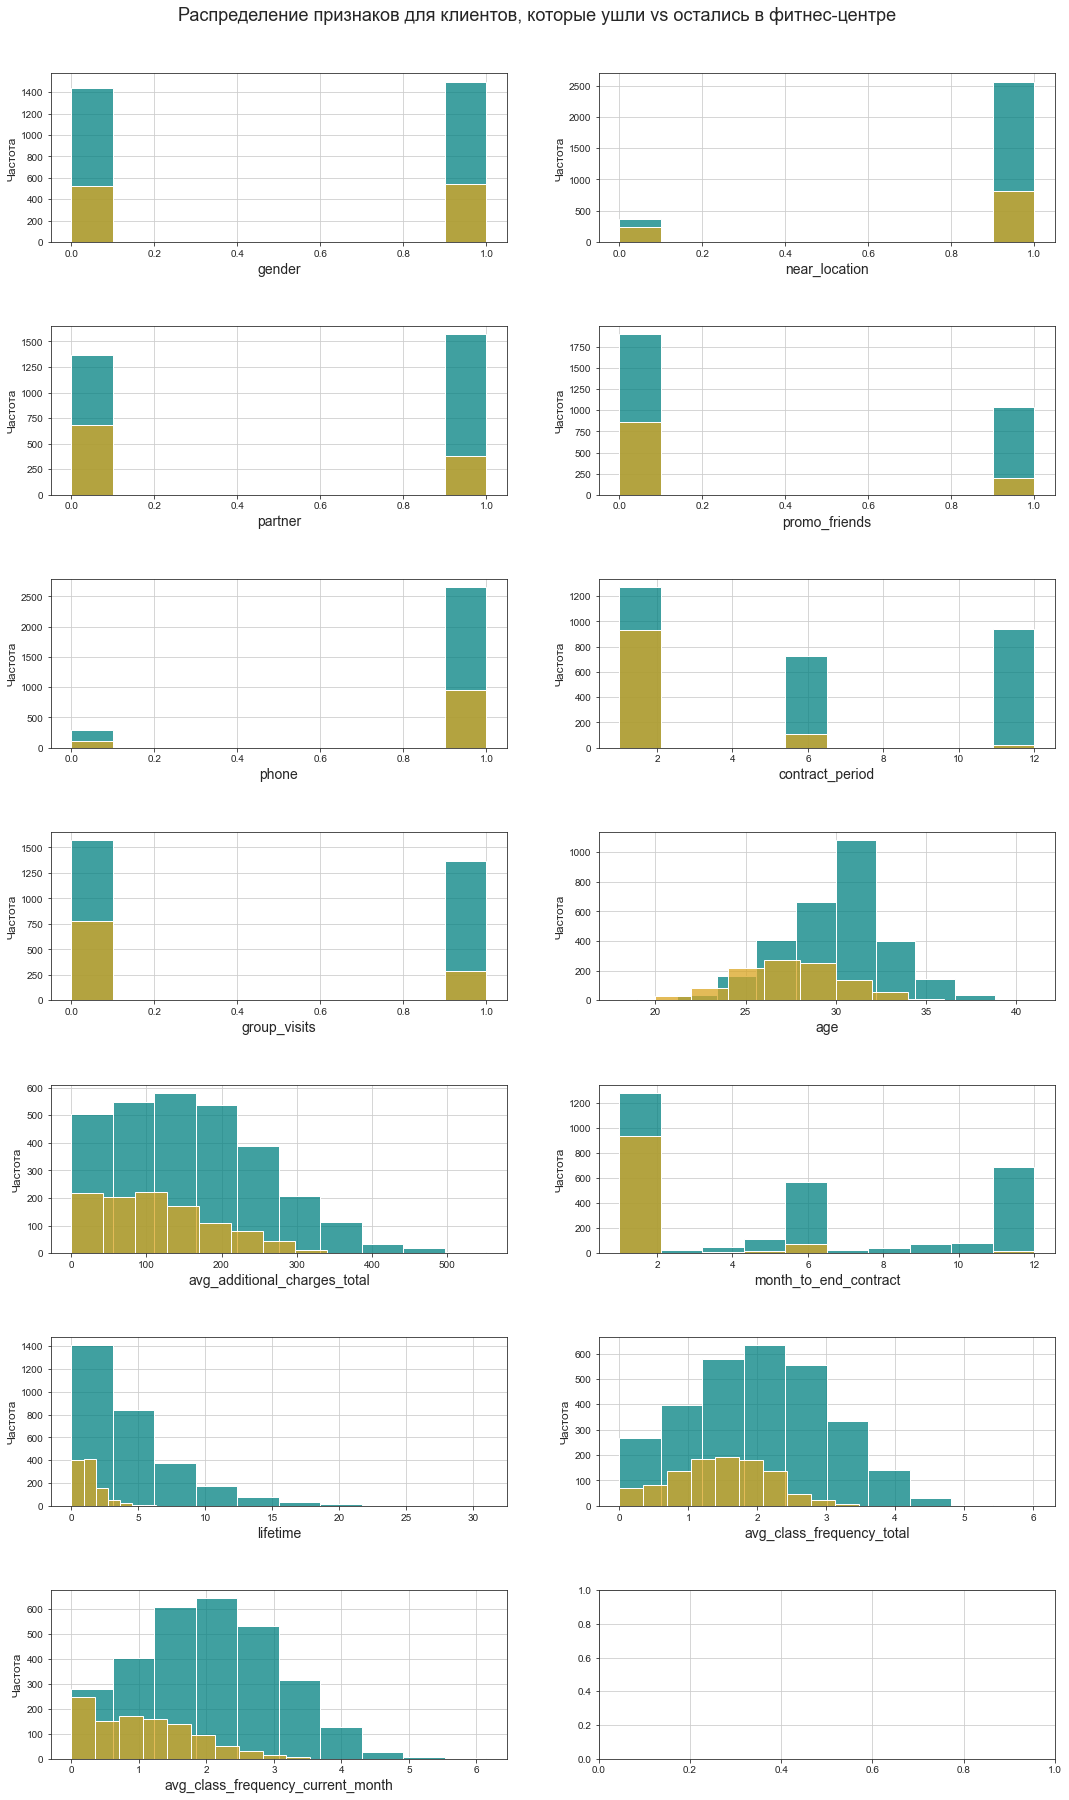

In [10]:
# создадим список названий признаков
features_col = df.columns.drop('churn')

sns.set_style("ticks",{'axes.grid' : True})
fig, axs = plt.subplots(7, 2, figsize=(18, 31))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Распределение признаков для клиентов, которые ушли vs остались в фитнес-центре", fontsize=18, y=0.91)
for col, ax in zip(features_col, axs.ravel()):
    sns.histplot(df.query('churn == 0')[col], color='teal', ax=ax, bins=10, label='клиент остался')
    sns.histplot(df.query('churn == 1')[col], color='goldenrod', bins=10, ax=ax, label='клиент ушел')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Частота', fontsize=12)
    ax.get_legend()
plt.show()

**Вывод**

Графики распределения признаков для клиентов в оттоке и тех, что остались в клубе показали следующее:

1. Нет существенной разницы мужчина это или женщина - процент оттока и постоянства практически одинаковый. 
2. Процент оттока у клиентов, что не живут и не работают вблици фитнес-центра значительно выше.
3. Если клиент пришел по партнерской программе или промо-акции - процент удержания значительно выше.
4. Приобретая абонемент на 1 месяц - в 75% случаев клиент уходит, тогда как абонемент на 12 месяцев - в значительной степени гарантирует постоянство клиента фитнкс-центру.
5. Если клиент не посещает групповые занятия - это в большей степени влияет на отток, чем факт посещения.
6. Возраст клиентов достаточно сильно влияет на факт оттока: чем старше клиент- тем менее склонен от к оттоку, чем моложе - тем сложнее его удержать в спорте.
7. Чем меньше клиент тратит на дополнительные услуги центра, тем выше вероятность оттока.
8. Клиенты в оттоке реже посещают фитнес-центр.

Напишем функции для расчета доли данных по каждому признаку отдельно для клиентов, которые остался в фитнес-центре и тех, кто ушел. Посмотрим на конкретные цифры динамики, что отражена на гистограммах.

In [11]:
def share(condition, column, data):
    '''
    функция рассчитывает долю клиентов 
    при определенном условие для фильтрации данных датасета
    '''
    return data.query(condition)[column].count() / len(data)

Посмотрим какая доля клиентов ушла из фитнес-центра в текущем месяце.

In [12]:
print('Доля оттока клиентов в текущем месяце: {:.0%}'
          .format(share('churn == 1', 'churn', df)))

Доля оттока клиентов в текущем месяце: 27%


In [13]:
def info(data):
    '''
    функция выводит на экран описание и доли из функции share
    '''
    
    print('Доля клиентов, купивших абонемент на 1 месяц: {:.0%}'
          .format(share('contract_period == 1', 'contract_period', data)))
    print('Доля клиентов, купивших абонемент на 6 месяц: {:.0%}'
          .format(share('contract_period == 6', 'contract_period', data)))
    print('Доля клиентов, купивших абонемент на год: {:.0%}'
          .format(share('contract_period == 12', 'contract_period', data)))
    print('Доля клиентов в возрасте моложе 28 лет: {:.0%}'
          .format(share('age <= 27', 'age', data)))
    print('Доля клиентов в возрасте старше 28 лет: {:.0%}'
          .format(share('age >= 28', 'age', data)))
    print('Доля клиентов с суммарной выручкой менее 200 рублей от других услуг клуба: {:.0%}'
          .format(share('avg_additional_charges_total <= 200', 'avg_additional_charges_total', data)))
    print('Доля клиентов со сроком окончания действующего абонемента менее 1 месяца: {:.0%}'
          .format(share('month_to_end_contract <= 1', 'month_to_end_contract', data)))
    print('Доля клиентов, являющихся постоянными членами фитнес-центра более года: {:.0%}'
          .format(share('lifetime >= 12', 'lifetime', data)))
    print('Доля клиентов, являющихся члена фитнес-центра менее 1 месяца: {:.0%}'
          .format(share('lifetime <= 1', 'lifetime', data)))
    print('Доля клиентов со средней частотой посещений 1 раз и менее в неделю за все время: {:.0%}'
          .format(share('avg_class_frequency_total <= 1.5', 'avg_class_frequency_total', data)))
    print('Доля клиентов со средней частотой посещений 1 раз и менее в неделю за предыдущий месяц: {:.0%}'
          .format(share('avg_class_frequency_current_month <= 1.5', 'avg_class_frequency_current_month', data)))
    print('Доля клиентов со средней частотой посещений 2-3 раза в неделю за все время: {:.0%}'
          .format(share('1.5 < avg_class_frequency_total <= 2.5', 'avg_class_frequency_total', data)))
    print('Доля клиентов со средней частотой посещений 2-3 раза  в неделю за предыдущий месяц: {:.0%}'
          .format(share('1.5 < avg_class_frequency_current_month <= 2.5', 'avg_class_frequency_current_month', data)))
    print('Доля клиентов со средней частотой посещений более 3 раз в неделю за все время: {:.2%}'
          .format(share('avg_class_frequency_total > 2.5', 'avg_class_frequency_total', data)))
    print('Доля клиентов со средней частотой посещений более 3 раз в неделю за предыдущий месяц: {:.2%}'
          .format(share('avg_class_frequency_current_month > 2.5', 'avg_class_frequency_current_month', data)))

Посмотрим дополнительную информацию среди клиентов, которые остались в фитнес-центре.

In [14]:
info(df.query('churn == 0'))

Доля клиентов, купивших абонемент на 1 месяц: 43%
Доля клиентов, купивших абонемент на 6 месяц: 25%
Доля клиентов, купивших абонемент на год: 32%
Доля клиентов в возрасте моложе 28 лет: 21%
Доля клиентов в возрасте старше 28 лет: 79%
Доля клиентов с суммарной выручкой менее 200 рублей от других услуг клуба: 67%
Доля клиентов со сроком окончания действующего абонемента менее 1 месяца: 43%
Доля клиентов, являющихся постоянными членами фитнес-центра более года: 7%
Доля клиентов, являющихся члена фитнес-центра менее 1 месяца: 17%
Доля клиентов со средней частотой посещений 1 раз и менее в неделю за все время: 32%
Доля клиентов со средней частотой посещений 1 раз и менее в неделю за предыдущий месяц: 32%
Доля клиентов со средней частотой посещений 2-3 раза в неделю за все время: 35%
Доля клиентов со средней частотой посещений 2-3 раза  в неделю за предыдущий месяц: 36%
Доля клиентов со средней частотой посещений более 3 раз в неделю за все время: 32.90%
Доля клиентов со средней частотой пос

Посмотрим дополнительную информацию среди клиентов, которые покинули фитнес-центр.

In [15]:
info(df.query('churn == 1'))

Доля клиентов, купивших абонемент на 1 месяц: 88%
Доля клиентов, купивших абонемент на 6 месяц: 10%
Доля клиентов, купивших абонемент на год: 2%
Доля клиентов в возрасте моложе 28 лет: 57%
Доля клиентов в возрасте старше 28 лет: 43%
Доля клиентов с суммарной выручкой менее 200 рублей от других услуг клуба: 84%
Доля клиентов со сроком окончания действующего абонемента менее 1 месяца: 88%
Доля клиентов, являющихся постоянными членами фитнес-центра более года: 0%
Доля клиентов, являющихся члена фитнес-центра менее 1 месяца: 77%
Доля клиентов со средней частотой посещений 1 раз и менее в неделю за все время: 51%
Доля клиентов со средней частотой посещений 1 раз и менее в неделю за предыдущий месяц: 73%
Доля клиентов со средней частотой посещений 2-3 раза в неделю за все время: 43%
Доля клиентов со средней частотой посещений 2-3 раза  в неделю за предыдущий месяц: 23%
Доля клиентов со средней частотой посещений более 3 раз в неделю за все время: 6.31%
Доля клиентов со средней частотой посещ

In [16]:
# посмотрим детально на lifetime для постоянных клиентов (не в оттоке)
(
    df
    .query('churn == 0')
    .groupby('lifetime')
    .agg({'lifetime':'count'})
    .rename(columns={'lifetime':'count'})
    .sort_values(by='count', ascending=False)
    .transpose()
)

lifetime,2,3,1,4,5,6,7,8,9,0,10,12,11,13,15,14,16,17,18,19,20,21,22,23,24,26,27,29,31
count,453,440,429,360,265,216,167,110,99,84,76,53,48,28,24,24,15,11,7,7,7,5,2,2,2,2,1,1,1


In [17]:
# посмотрим детально на lifetime для клиентов в оттоке
(
    df
    .query('churn == 1')
    .groupby('lifetime')
    .agg({'lifetime':'count'})
    .rename(columns={'lifetime':'count'})
    .sort_values(by='count', ascending=False)
    .transpose()
)

lifetime,1,0,2,3,4,5,6,8,9
count,414,403,157,50,23,8,4,1,1


**Вывод**

Таким образом в цифрах подтвердили ранее сделаенные выводы.
В том числе узнали, что lifetime клиентов в оттоке не превышает 9 месяцев, тогда как lifetime постоянных клиентов доходит до 31 месяца.
На данный момент можно сформулировать следующее утверждение: чем дольше клиент ходит в центр, чем чаще он посещает занятия и чем больше времени и средств тратит в фитнес-центре - тем меньше вероятность оттока.
Чем моложе клиент, чем дальше он живет/работает от фитнес-центра, чем меньше времени и сил он оставляет в центре - тем выше вероятность оттока.
Более детально разберемся дальше.

**3. Посмотрим на взаимосвязи между признаками - построим матрицу корреляций.**

In [18]:
def heatmap(data):
    """
    функция вывода матрицы корреляций
    """
    plt.figure(figsize=(15, 6)) 
    # Определите маску, чтобы установить значения в верхнем треугольнике на True 
    mask = np.triu(np.ones_like(data.corr())) 
    heatmap = sns.heatmap(data.corr().round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis') 
    heatmap.set_title('Корреляционная тепловая карта', fontdict={'fontsize':18}, pad=16);

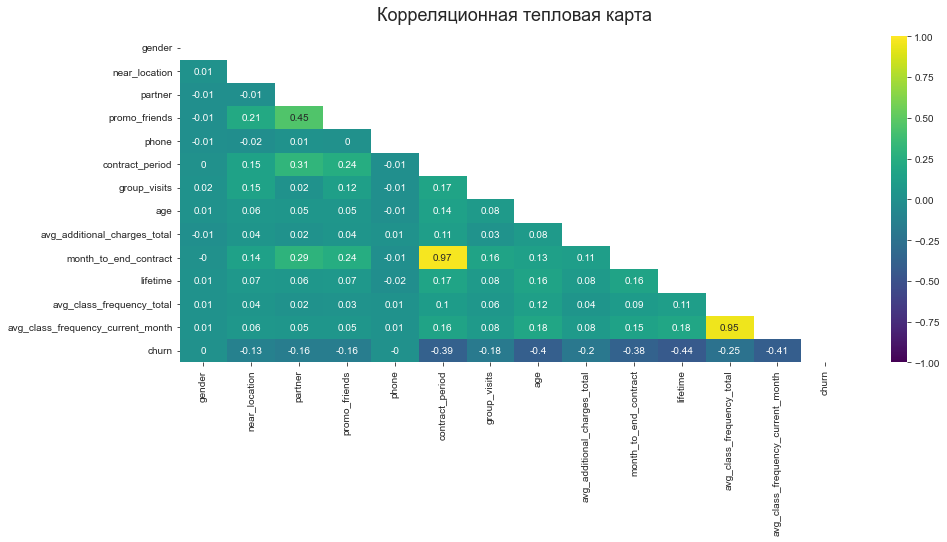

In [19]:
heatmap(df)

**Промежуточные выводы**

Есть две пары сильно положительно коррелирующих между собой признаков:

   - `month_to_end_contract` и `contract_period` - коэффициент корреляции 0.97,
   - `avg_class_frequency_current_month` и `avg_class_frequency_total` - коэффициент корреляции 0.95.
    
Мультиколлинеарность признаков может привести к неустойчивости коэффициентов только в линейных моделях - логистической регрессии. Именно удалени этих двух признаков дало лучшие показатели метрик при построении моделей - `month_to_end_contract` и `avg_class_frequency_total`, поэтому их и удалим.

Но тепловая карта показала и признаки, где корреляция с целевой переменной близка к нулю:
  1. `gender`
  2. `phone`

Корреляция между следующими признаками отрицательная, но слабая:
   1. `near_location`
   2. `partner`
   3. `promo_friends`
   4. `group_visits`
   5. `avg_additional_charges_total`

In [20]:
# удалим малозначительные признаки
df = df.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

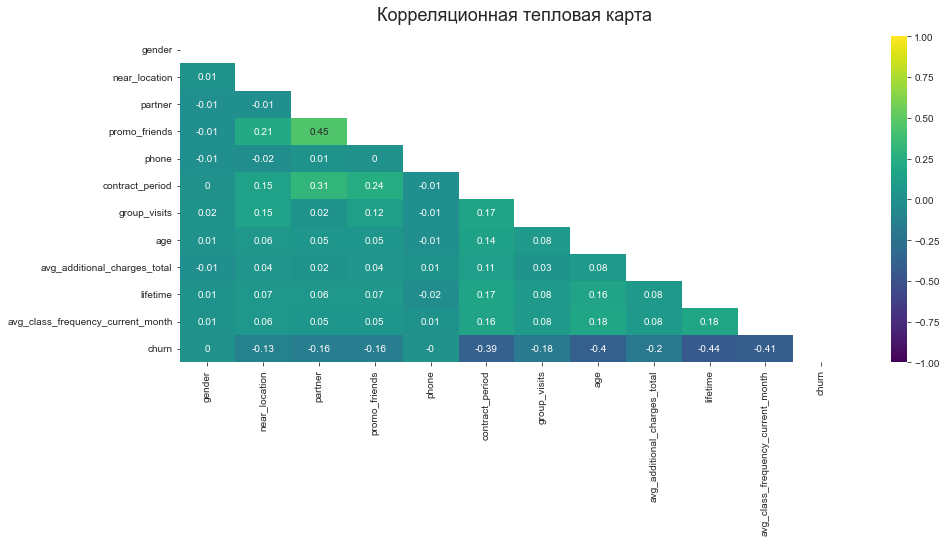

In [21]:
# посмотрим на корреляционную тепловую карту на обновленных данных
heatmap(df)

**Вывод**

На основании проведенного разведочного анализа данных мы детально ознакомились с данными и выявили:

1. Нет весомого различия в группах по следующим признакам:
    - пол,
    - проживание/работа вблизи фитнес-центра,
    - выручка от других услуг центра одинаково низкая.


2. Возможные признаки, влияющие на отток:
    - клиенты в оттоке реже приходят по партнерской программе или проакциям,
    - клиенты в оттоке  в среднем приобретают абонемент на 1.7 мес, тогда как постоянные (те, что остаются в центре) - на 5.75 мес., 
    - клиенты в оттоке в 2 раза реже посещают групповые занятия,
    - средний возраст клиента в оттоке моложе постоянных на 3 года (27 лет, против 30 для лояльных),
    - средняя посещаемость центра у клиентов в оттоке минимум в 2 раза ниже - 1 раз в неделю,
    - неудивительно, что и lifetime клиентов в оттоке в 5 раз ниже, чем у постоянных (0.99 против 4.71 мес). Ни один клиент в оттоке       не задержался в центре более, чем на 9 месяцев, тогда как для постояннх клиентов это показатель - 31 месяц. 
    - 88% всех клиентов в оттоке приобретают абонемент всего на 1 месяц.
    
    
3. Общая доля оттока клиентов в текущем месяце составляет -  27%, почти каждый третий клиент уходит из фитнес-центра.


4. Аномальных выбросов в данных нет.


5. Выявлены и удалены из датасета мультиколлинеарные признаки (`month_to_end_contract`, `avg_class_frequency_total`).

## Построение модели прогнозирования оттока клиентов.

В этом разделе будут сделаны следующие шаги:

1. Данные разобьем на обучающую и валидационную выборку.
2. Проверим целевую переменную на дисбаланс класса.
2. Обучим модель на train-выборке двумя способами:
    - логистической регрессией,
    - случайным лесом.
3. Оценим метрики accuracy, precision, recall и F1-меру для всех моделей на валидационной выборке.
4. Выявим лучшую модель машинного обучения по метрикам. 

### Разделение данных на выборки

Для начала разделим данные на признаки и выделим целевой признак: 

In [22]:
# целевой признак
target = df['churn']
# признаки
features = df.drop('churn', axis=1)

Разделим исходные данные на: 

    1. обучающую выборку - 80%
    2. валидационную выборку - 20%
    
С помощью параметра `random_state=999 ` зафиксируем псевдослучайность результата, чтобы можно было повторить удачный эксперимент. А для того, чтобы быть уверенным, что целевая переменная будет разделена в том же соотношении, что и в исходных данных, используем параметр `stratify`.

In [23]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.2, 
                                                                              random_state=999, 
                                                                              stratify=target)

Посмотрим на размер наших выборок:

In [24]:
print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационно выборки:', features_valid.shape)

Размер обучающей выборки: (3200, 11)
Размер валидационно выборки: (800, 11)


### Иследование баланса классов

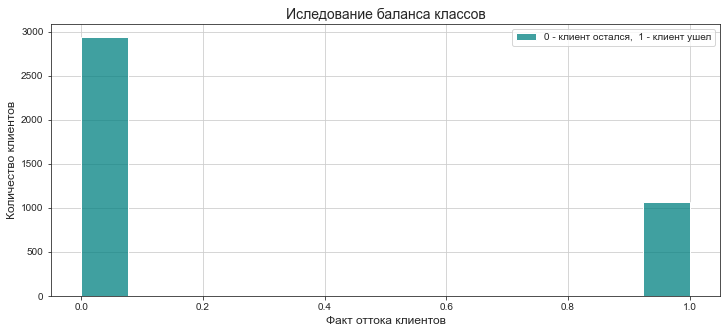

In [25]:
# посмотрим на распределение классов на графике
plt.figure(figsize=(12, 5))
sns.histplot(df['churn'], color='teal', label='0 - клиент остался,  1 - клиент ушел')
plt.title('Иследование баланса классов', fontsize=14)
plt.xlabel('Факт оттока клиентов', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.legend()
plt.show()

In [26]:
# дисбаланс в абсолютных цифрах
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

В данных присутствует дисбаланс класса целевой переменной `churn` и, возможно, это склонит модели к прогнозированию наиболее часто используемого класса, далее попробуем это отрегулировать с помощью гиперпараметра `class_weight='balanced'`.

### Обучение моделей

Факт ухода клиента из фитнес-центра - это бинарный признак с двумя категориями, значит перед нами стоит задача бинарной классификации.
Для задачи бинарной классификации рассмотрим две модели машинного обучения:

   1. 'Логистическая регрессия' 
   2. 'Случайный лес'
   
Попробуем найти оптимальную модель машинного обучения через подбор дополнительных гиперпараметров.

#### Модель "Логистическая регрессия"

Напишем фукнцию для модели "Логистическая регрессия" с возможность проверить качество метрик с балансом и без баланса класса.

In [27]:
def model_lr(X_train, X_valid, y_train, y_valid, weight):
    '''
    функция для построения модели
    '''
    model_lr = LogisticRegression(random_state=999, solver='liblinear', class_weight=weight)
    model_lr.fit(X_train, y_train)
    return model_lr

In [28]:
def model_lr_and_metrics(X_train, X_valid, y_train, y_valid, weight):
    """
    функция для построения модели и расчета метрик
    """
    model_lr = LogisticRegression(random_state=999, solver='liblinear', class_weight=weight)
    model_lr.fit(X_train, y_train)
    predicted_valid = model_lr.predict(X_valid)
    accuracy = accuracy_score(y_valid, predicted_valid)        
    recall = recall_score(y_valid, predicted_valid)   
    precision = precision_score(y_valid, predicted_valid)
    f1 = f1_score(y_valid, predicted_valid)

    print("\tМетрики Логистической регрессии:")
    print()
    print('\tДоля правильных ответов - accuracy: {:.2f}'.format(accuracy))
    print('\tТочность - precision: {:.2f}'.format(precision))
    print('\tПонота - recall: {:.2f}'.format(recall))
    print('\tF1 - мера: {:.2f}'.format(f1))   

In [29]:
# построим модель без баланса классов
model_lr_and_metrics(features_train, features_valid, target_train, target_valid, None)

	Метрики Логистической регрессии:

	Доля правильных ответов - accuracy: 0.91
	Точность - precision: 0.83
	Понота - recall: 0.81
	F1 - мера: 0.82


In [30]:
# построим модель с балансом классов
model_lr_and_metrics(features_train, features_valid, target_train, target_valid, 'balanced')

	Метрики Логистической регрессии:

	Доля правильных ответов - accuracy: 0.91
	Точность - precision: 0.76
	Понота - recall: 0.95
	F1 - мера: 0.85


Благодаря балансу классов метрики стали лучше. 

Посмотрим на рейтинг важности признаков для Логистической регрессии:

In [31]:
# создадим датафрейм с признаками и их весами
importance_features = pd.DataFrame({'feature': features_train.columns, 
                                    'coef': list(model_lr(features_train,
                                                          features_valid, 
                                                          target_train, 
                                                          target_valid, 
                                                          'balanced').coef_[0])}) 
importance_features['coef_abs'] = importance_features['coef'].abs()  # напишите свой код здесь

# выведите упорядоченный по модулю коэффициентов датафрейм с признаками
importance_features.sort_values(by='coef_abs', ascending=False).drop('coef', axis=1)

,feature,coef_abs
10,avg_class_frequency_current_month,1.106949
9,lifetime,0.893938
6,group_visits,0.660233
3,promo_friends,0.465198
4,phone,0.320127
5,contract_period,0.255873
7,age,0.212417
0,gender,0.141663
1,near_location,0.081592
2,partner,0.009680


#### Модель "Случайный лес"

Попробуем обучить разное количество независимых друг от друга деревьев и найти лучшие показатели метрик. Постараемся определить в циклах оптимальное количество деревьев в модели через гиперпараметр `n_estimators`, а глубину дерева - через гиперпараметр `max_depth`. Сбалансируем классы с помощью гиперпараметра `class_weight='balanced`. 

Основополагающей метрикой при выборе оптимальной модели возьмем F1-меру, так как она является сводной метрикой, учитывающей баланс между метриками precision и recall.

In [32]:
best_model = None
best_f1 = 0
best_est = 0
best_predicted_valid = []

for est in range(10, 61, 10):
    for depth in range (1, 21, 1):
        model = RandomForestClassifier(random_state=999, 
                                       n_estimators=est, 
                                       max_depth=depth, 
                                       class_weight='balanced')
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid) 
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1:
            best_model = model
            best_f1 = f1
            best_est = est
            best_depth = depth
            best_predicted_valid = predicted_valid
            

accuracy = accuracy = accuracy_score(target_valid, best_predicted_valid)      
recall = recall_score(target_valid, best_predicted_valid)
precision = precision_score(target_valid, best_predicted_valid)
            
print("\tЛучшая модель:", best_model)    
print()
print("\tМетрики лучшей модели 'Случайного леса':")
print()
print('\tДоля правильных ответов - accuracy: {:.2f}'.format(accuracy))
print('\tТочность - precision: {:.2f}'.format(precision))
print('\tПонота - recall: {:.2f}'.format(recall))
print('\tF1 - мера: {:.2f}'.format(f1))   

	Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=30,
                       random_state=999)

	Метрики лучшей модели 'Случайного леса':

	Доля правильных ответов - accuracy: 0.92
	Точность - precision: 0.79
	Понота - recall: 0.93
	F1 - мера: 0.80


Посмотрим на рейтинг важности признаков для модели "Случайный лес":

In [33]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
importance_features = (
    pd
    .DataFrame({'feature': features_train.columns, 
                'importances': model.feature_importances_})
    .sort_values(by='importances', 
                 ascending=False)
)
importance_features

,feature,importances
9,lifetime,0.301893
10,avg_class_frequency_current_month,0.222553
7,age,0.141918
5,contract_period,0.137353
8,avg_additional_charges_total,0.111082
6,group_visits,0.019329
3,promo_friends,0.016332
0,gender,0.015544
2,partner,0.015421
1,near_location,0.011259


**Вывод**

  Поскольку рамками проекта не задана главная метрика бизнеса, то мы взяли за основной критерий качества предсказаний модели - метрику F1-мера, как баланс между точностью и полнотой предсказаний. По этой метрике пальма первенства присуждается модели машинного обучения "Логистическая регрессия"  с F1-мера равной 0.85. Хотя стоит отметить, что каждая метрика в обеих моделях показала достаточно высокий уровень предсказаний.

Рейтинг важности признаков для обеих моделей имеет небольшое расхождение. Тем не менее обе модели на первые два места важности признаков поставили: `lifetime` и `avg_class_frequency_current_month`.

## Кластеризация клиентов

В этом разделе будут сделаны следующие шаги:
1. Проведем стандартизацию признаков.
2. Построим матрицу расстояний и нарисуем дендрограмму. Сделаем предположение о количестве кластеров.
3. Обучим модель кластеризации и спрогнозируем кластеры.
4. Изучим средние значения признаков для кластеров.
5. Изучим распределение признаков для кластеров.
6. Посчитаем долю оттока для каждого кластера. Выявим надежные кластеры и кластеры, склонные к оттоку.

### Матрица расстояний и дендрограмма

**1. Стандартизация признаков**

Поскольку числовые признаки в нашем проекте имею разный масштаб, то перед кластеризацией обязательно проведем стандартизацию признаков.

In [34]:
# создадим объект класса StandardScaler
scaler = StandardScaler()
# обучим модель и стандартизируем признаки 
features_sc = scaler.fit_transform(features)

**2. Построим матрицу расстояний и нарисуем дендрограмму.**

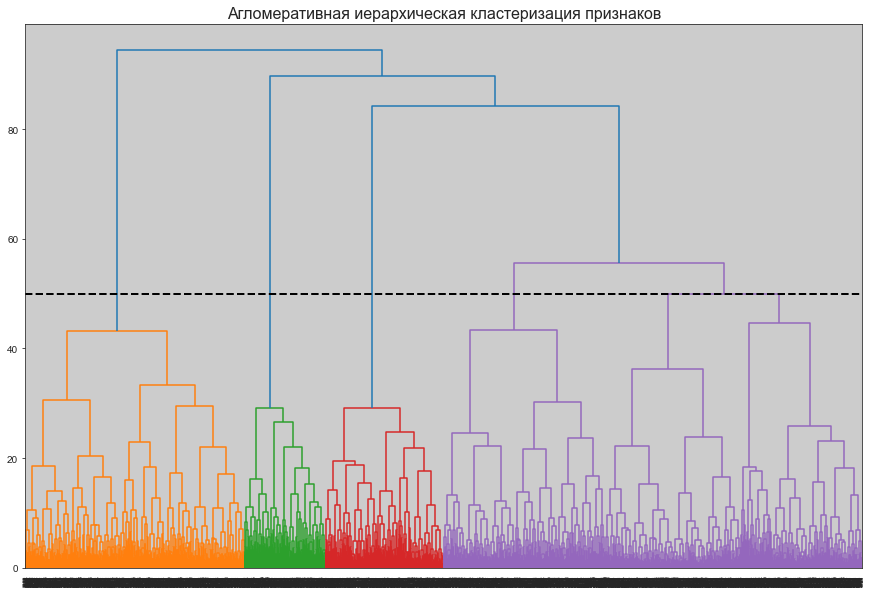

In [35]:
# создадим матрицу расстояний между признаками
linked = linkage(features_sc, method = 'ward') # параметр «ward» минимизирует дисперсию объединяемых кластеров.

# визуализация матрицу расстояний на графике дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
# разрез дендрограммы на уровне середины
plt.axhline(y=50, color='black', linestyle='--', lw=2)
plt.title('Агломеративная иерархическая кластеризация признаков', fontsize=16)
plt.show() 

На основании полученной дендрограммы можно предположить, что оптимальное количество кластеров- 5, но возможны варианции от 4 до 9.

### Модель кластеризации K-Means

**1. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.**

Для расчета возьмем 5 кластеров.

In [36]:
# задаём число кластеров = 5, и фиксируем значение random_state 
km = KMeans(n_clusters=5, random_state=999) 
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(features_sc) 

In [37]:
# добавлям метки кластеров к основному датасету
df['clusters'] = labels
# посмотрим на обновленный датасет
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,clusters
0,1,1,1,1,0,6,1,29,14.23,3,0.00,0,4
1,0,1,0,0,1,12,1,31,113.20,7,1.91,0,3
2,0,1,1,0,1,1,0,28,129.45,2,1.74,0,0
3,0,1,1,1,1,12,1,33,62.67,2,3.36,0,1
4,1,1,1,1,1,1,0,26,198.36,3,1.12,0,1


Проверим качество кластеризации модели K-Means метрикой silhouette путем перебора количества кластеров:

In [38]:
for cluster in  list (range(2, 10)):
    km = KMeans(n_clusters=cluster, random_state=999)
    labels = km.fit_predict(features_sc)
    silhouette = silhouette_score(features_sc, labels)
    print("For n_clusters = {}, silhouette score is {:.2})".format(cluster, silhouette))

For n_clusters = 2, silhouette score is 0.14)
For n_clusters = 3, silhouette score is 0.15)
For n_clusters = 4, silhouette score is 0.17)
For n_clusters = 5, silhouette score is 0.14)
For n_clusters = 6, silhouette score is 0.13)
For n_clusters = 7, silhouette score is 0.13)
For n_clusters = 8, silhouette score is 0.13)
For n_clusters = 9, silhouette score is 0.13)


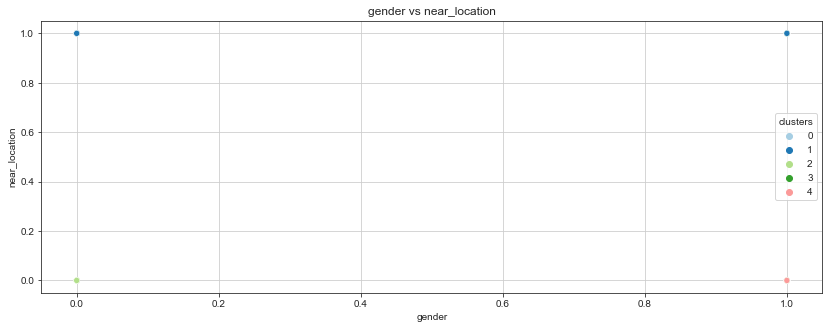

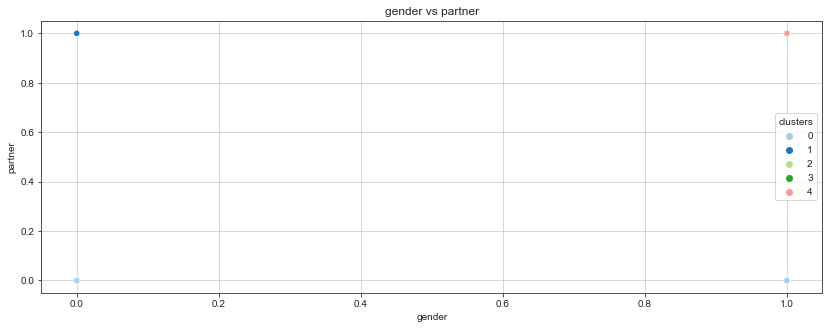

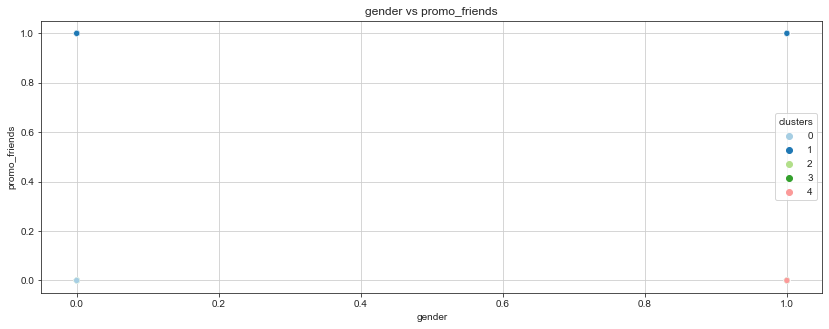

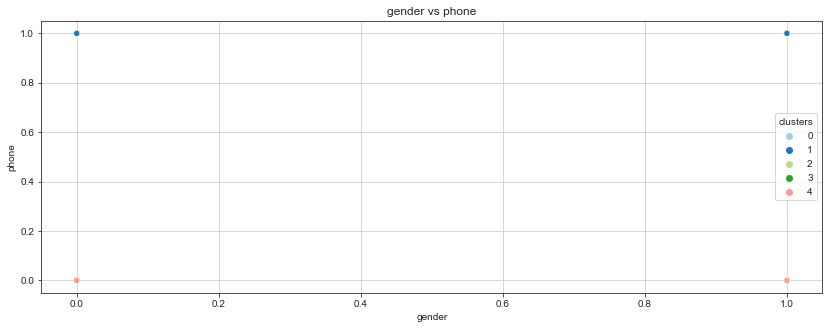

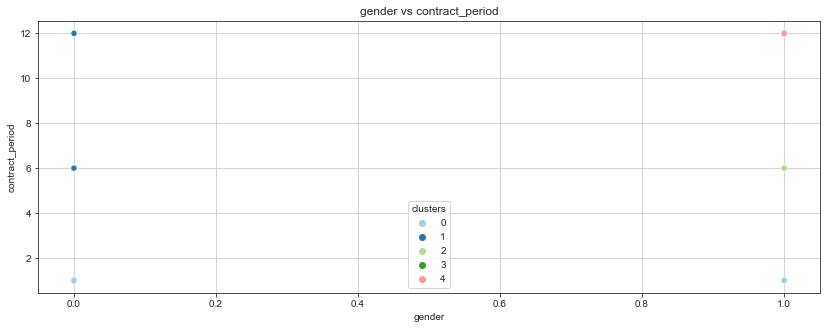

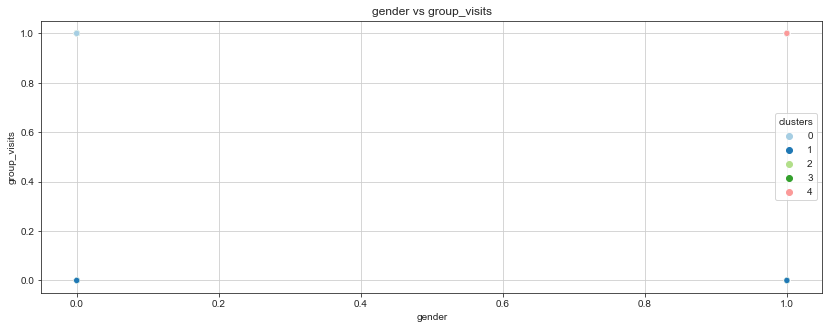

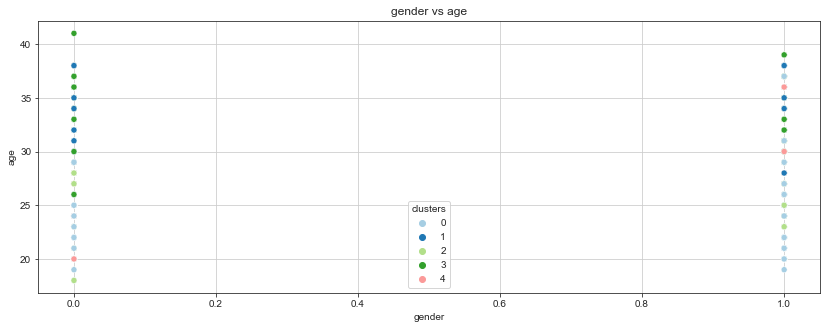

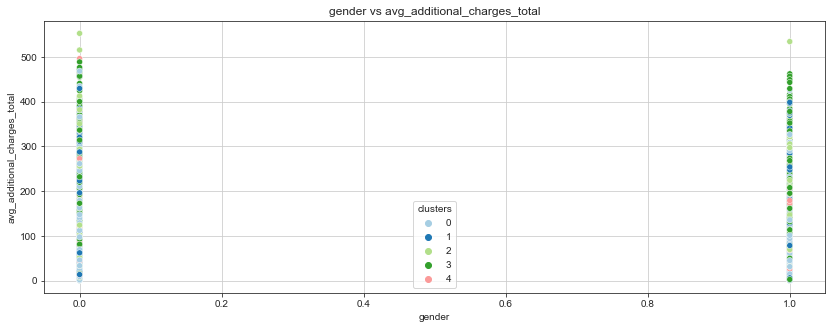

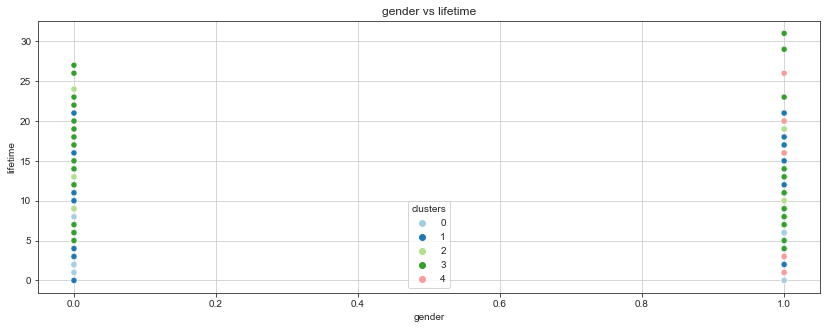

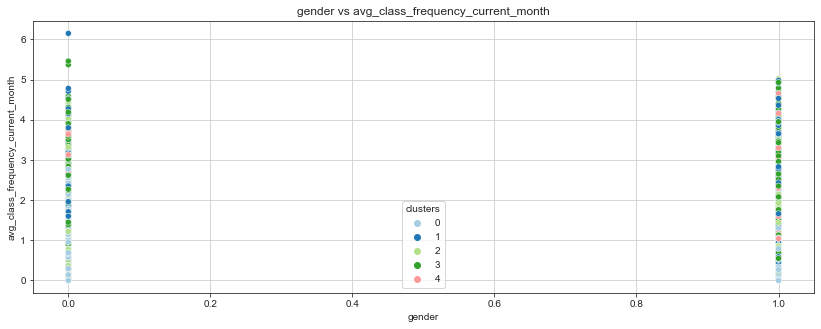

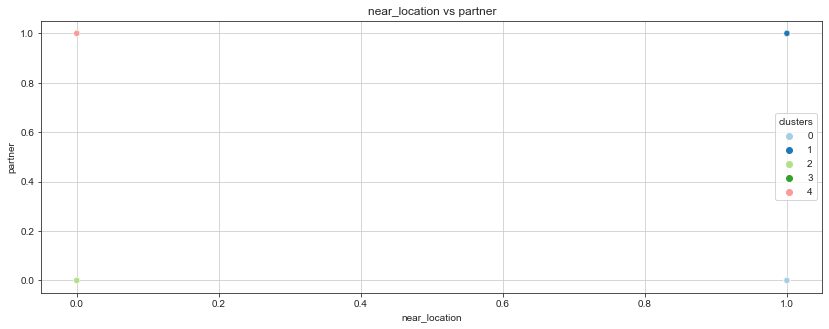

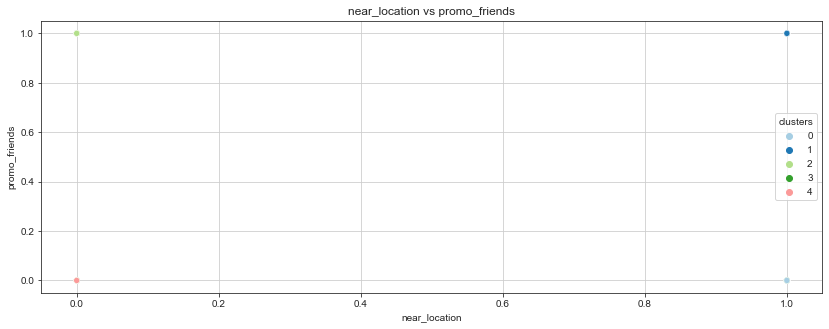

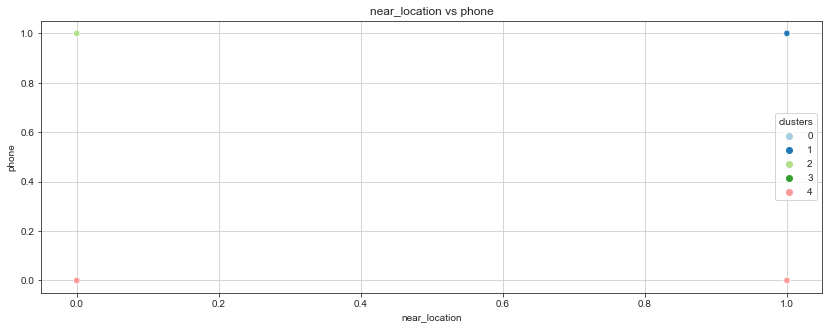

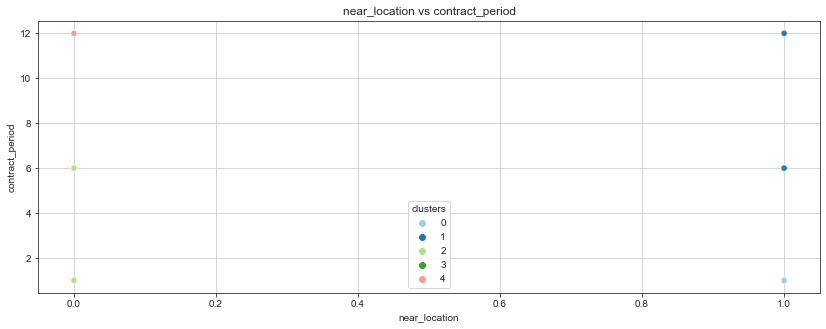

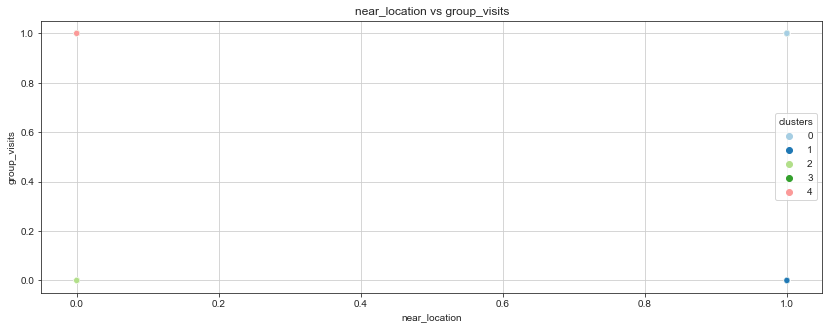

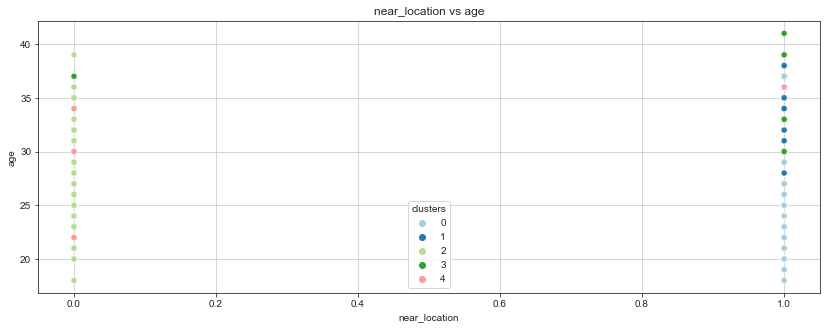

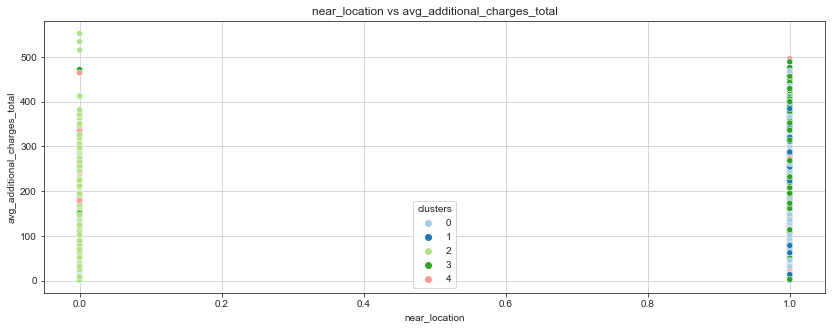

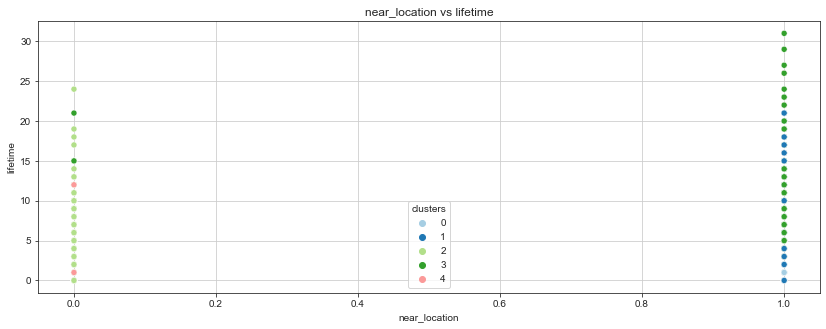

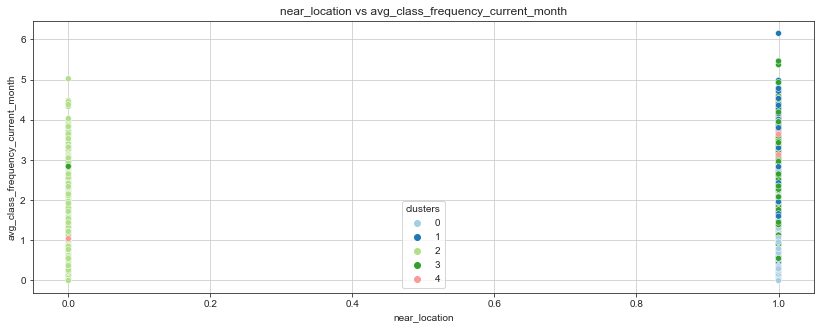

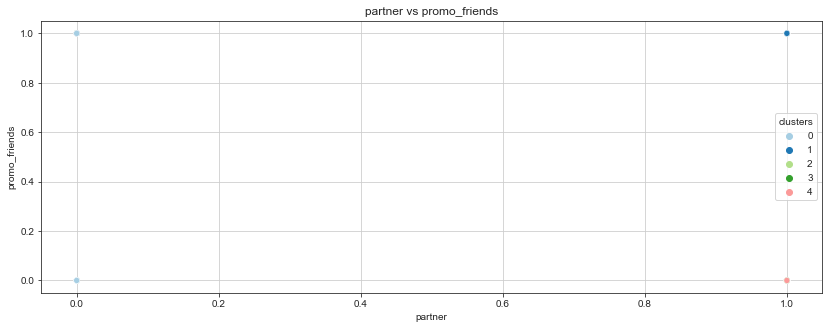

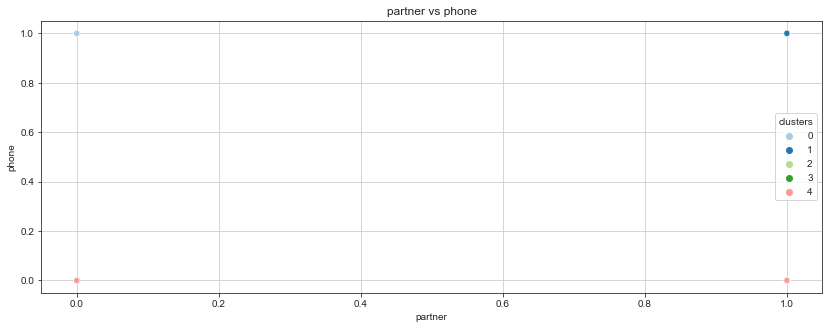

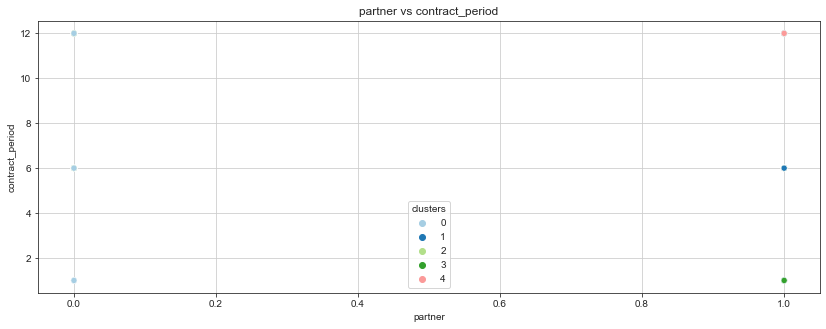

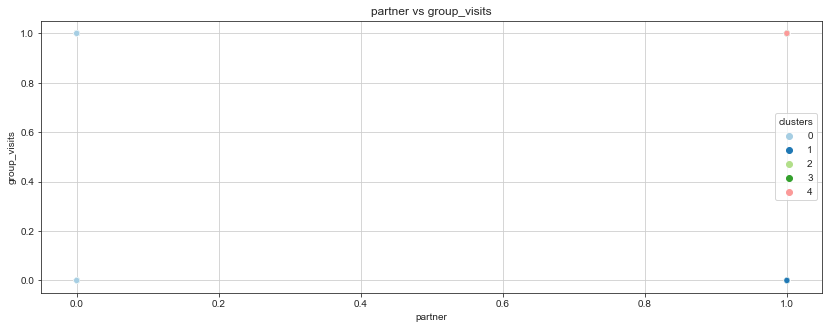

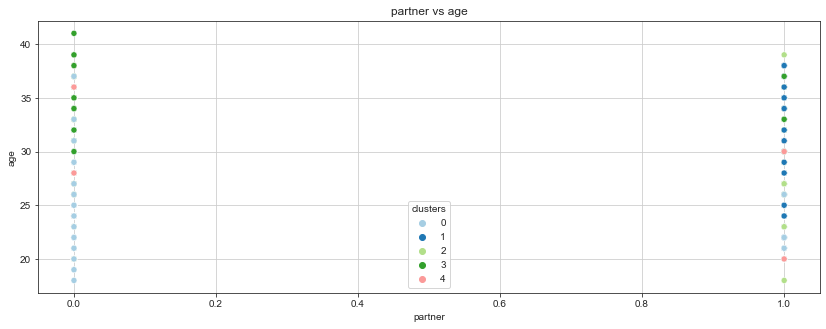

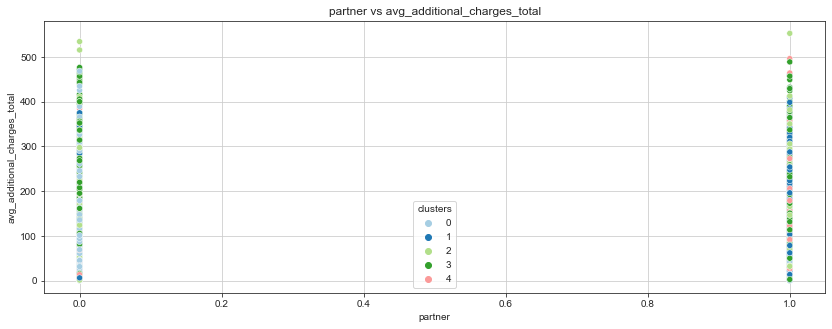

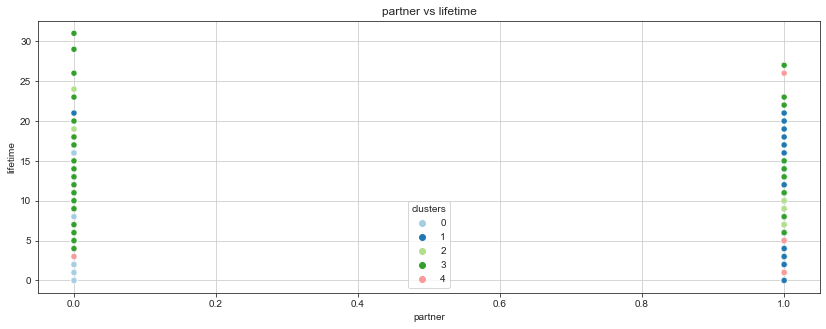

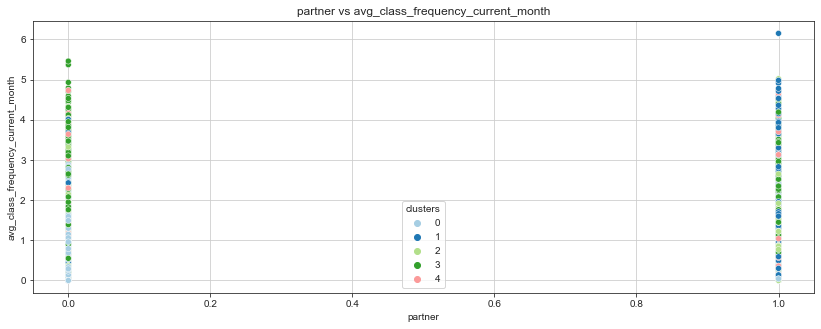

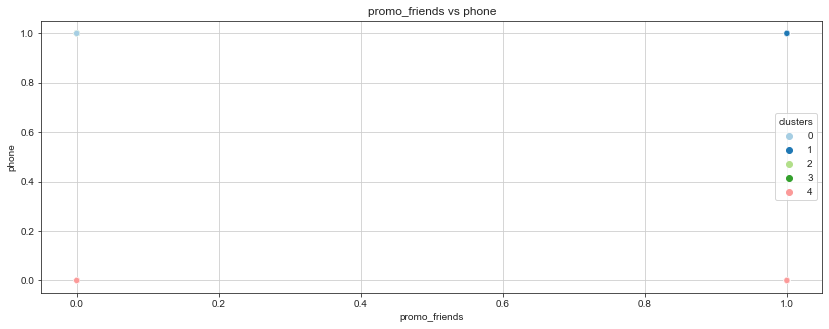

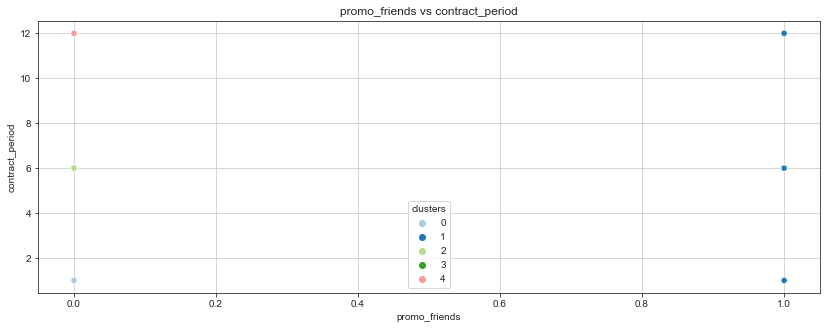

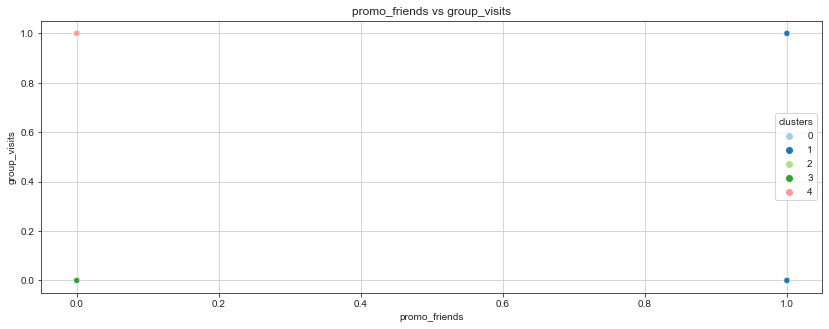

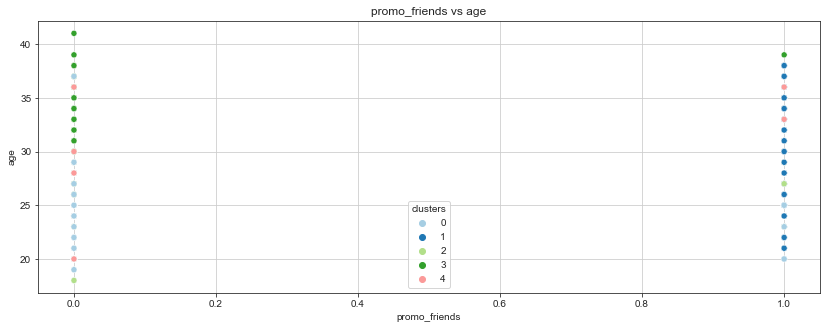

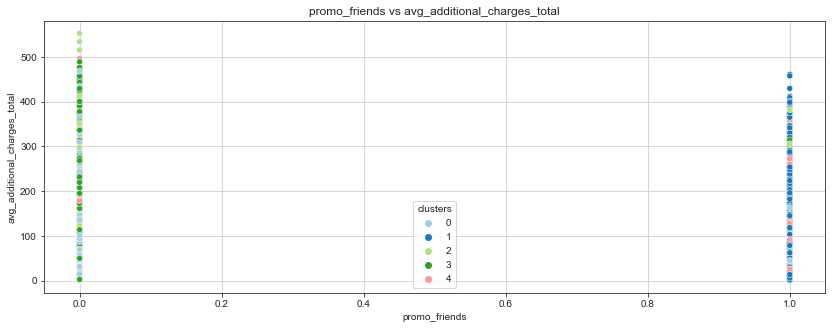

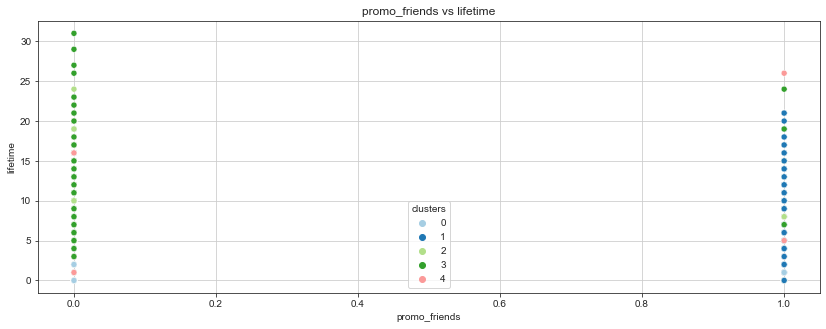

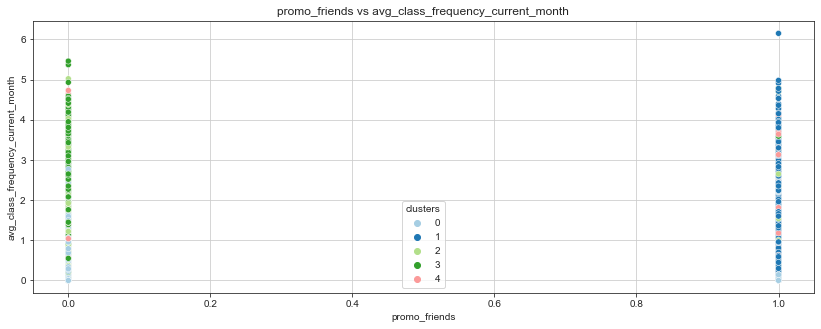

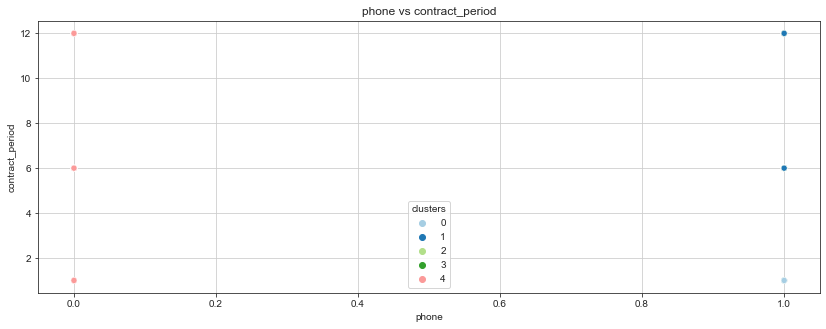

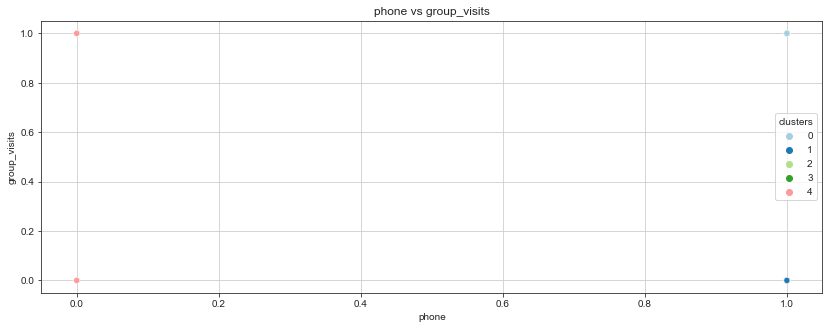

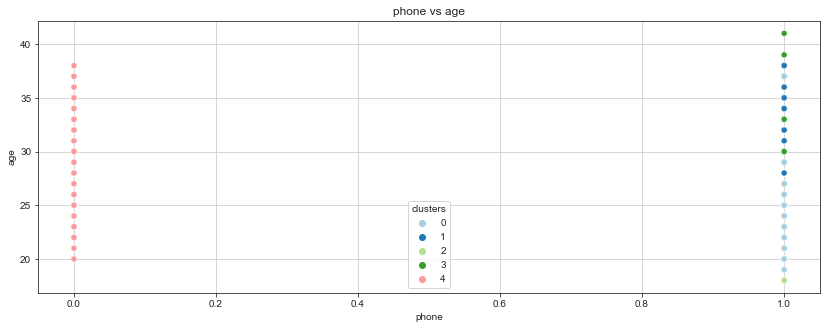

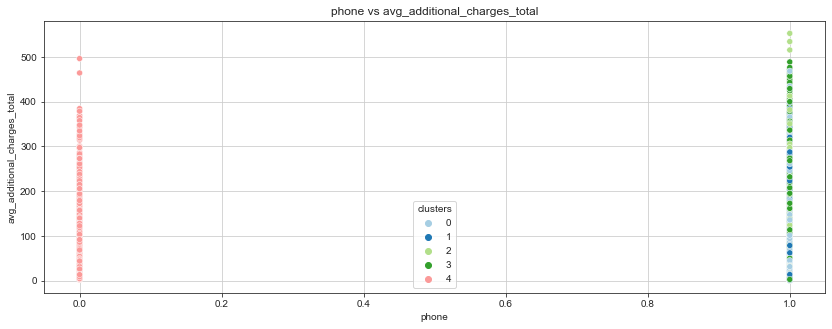

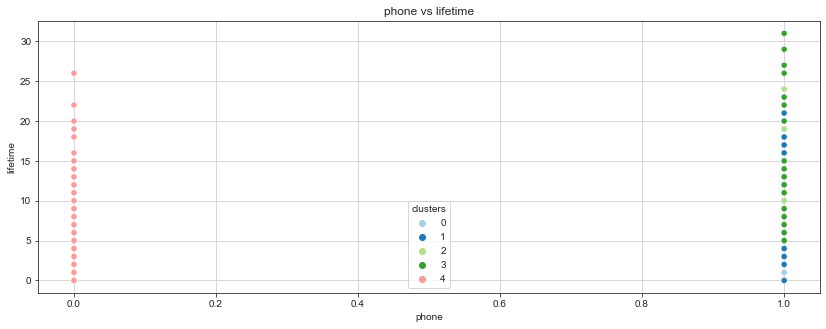

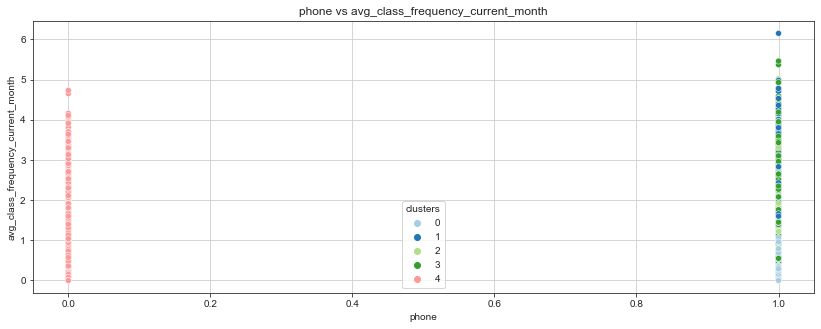

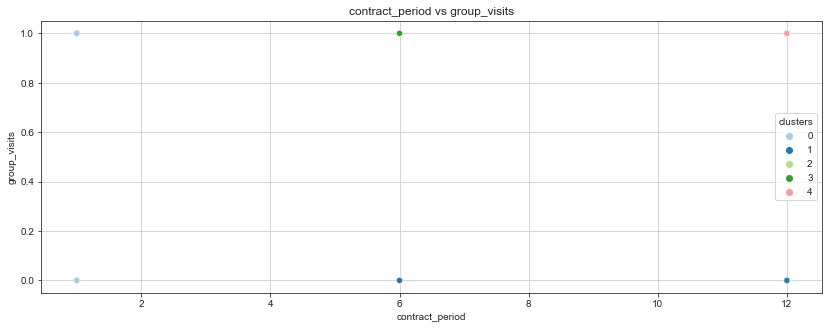

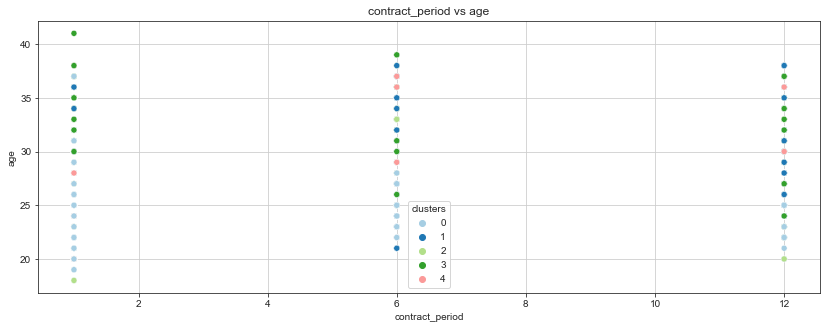

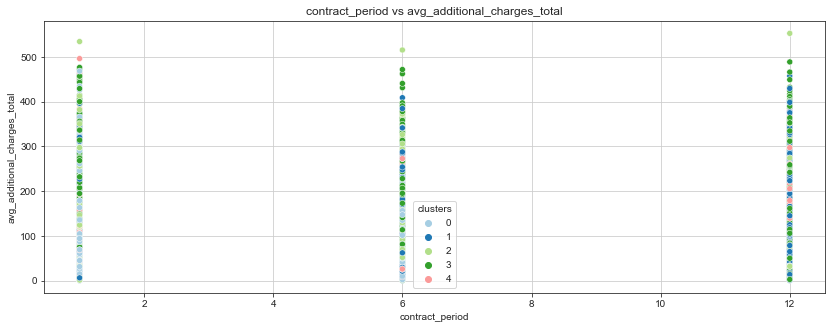

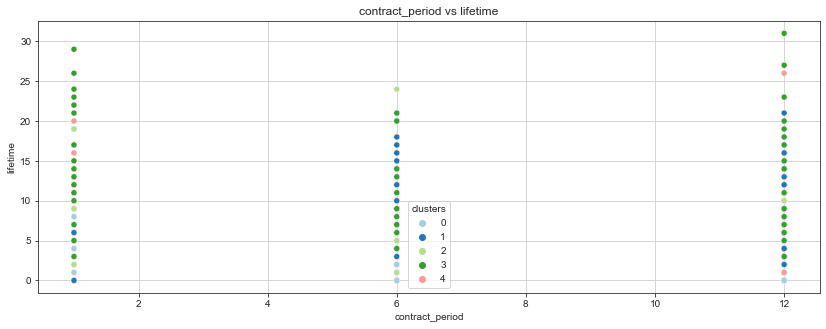

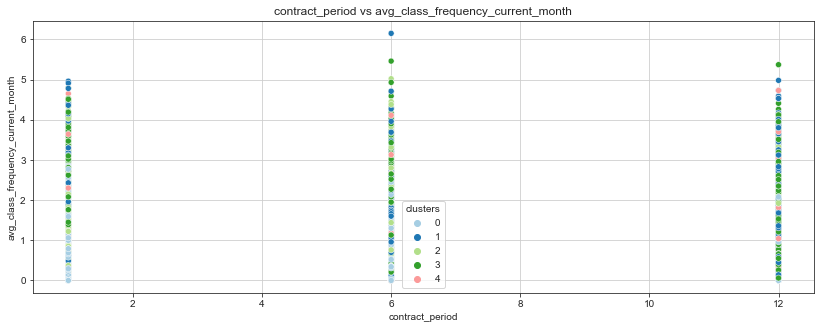

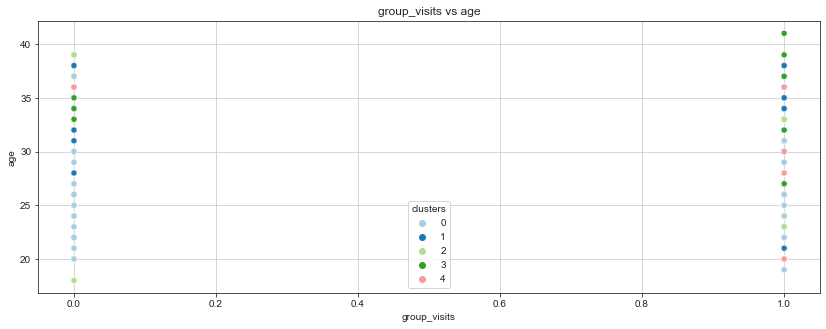

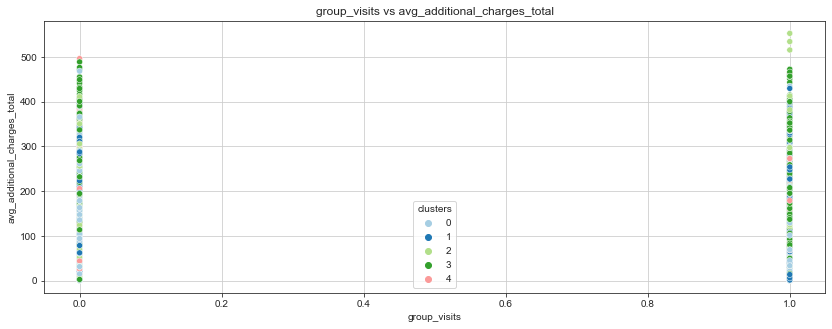

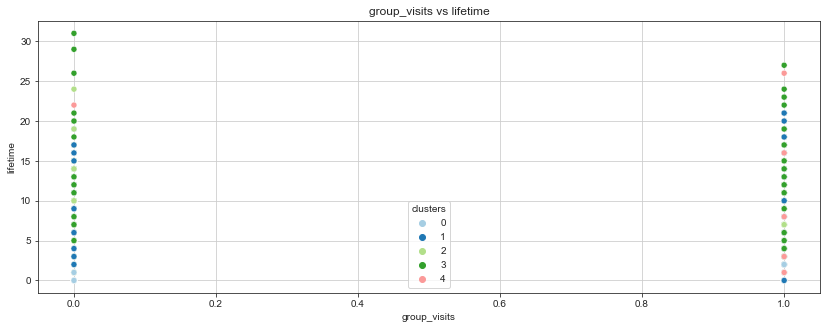

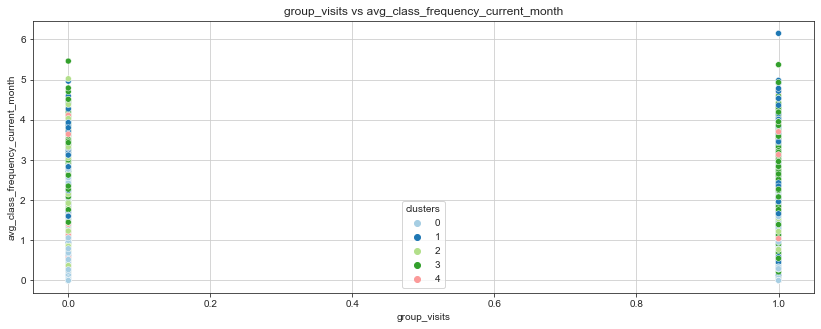

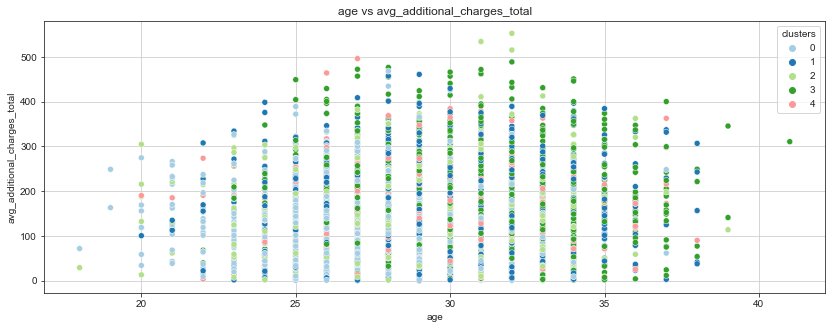

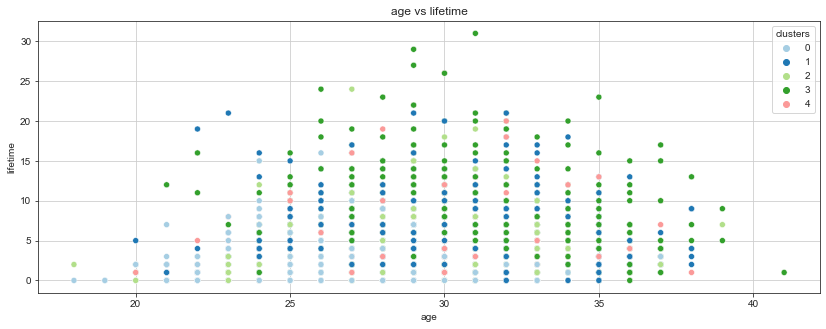

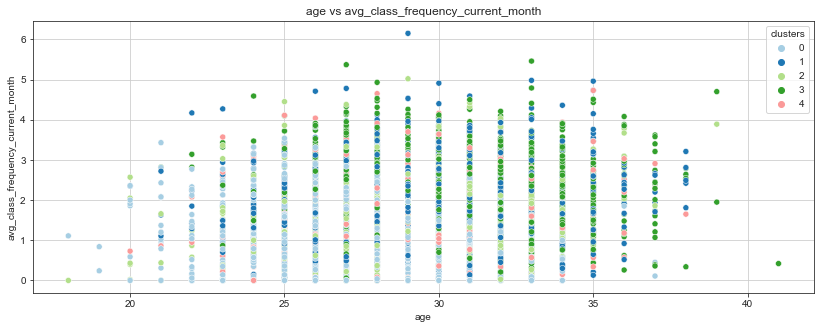

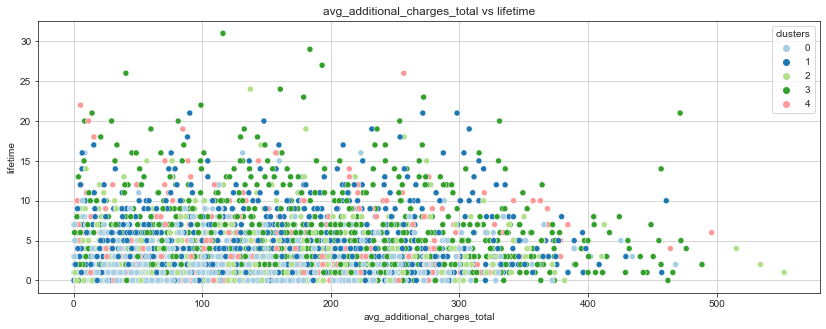

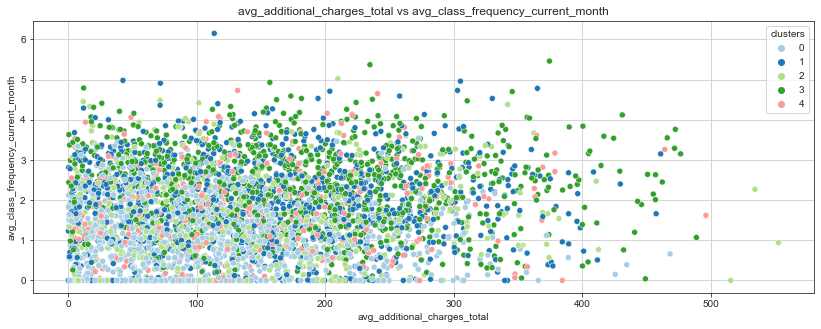

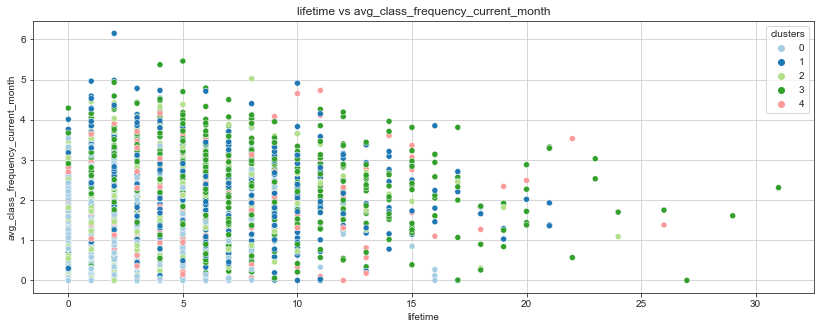

In [39]:
# функция отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(data, x_name, y_name, cluster_name):
    plt.figure(figsize=(14, 5))
    sns.scatterplot(x=df[x_name], y=df[y_name], hue=df[cluster_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


# создадим список попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(df.drop(['clusters', 'churn'], axis=1).columns, 2))

# отрисуем графики для попарных сочетаний признаков 
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'clusters')

**Вывод**

Метрика silhouette показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой и может находиться в пределах от -1 до 1. Но в нашем случае большинство признаков - бинарные - имеет малый разброс значений - 0/1, отсюда и среднее расстояние от объекта до других объектов кластера не может характеризоваться компактностью (кучностью) кластера, поэтому и показатель метрики такой низкий. Да, в нашем случае метрика silhouette указала на довольно невысокое качество кластеризации, хотя разделение на 4 кластера дало бы хотя и несущественно, но лучший показатель метрики. 

Улучшить метрику silhouette можно путем уменьшения признаков или, наоборот, подбором большего количества признаков, характеризующих кластер. В качестве доказательства и эксперименты мы добились silhouette = 0.45 путем уменьшения количества признаков, оставив только следующие:

   * `near_location`,
   * `age`,
   * `lifetime`,
   * `contract_period`,
   * `group_visits`.
   
Но поскольку оптимального алгоритма кластеризации не существует, то оставим все признаки на месте и посмотрим на средние значения признаков для кластеров.

### Cредние значения признаков для кластеров

In [40]:
# посчитаем средние значения признаков для кластеров, удалив столбец с целевой переменной
df.drop('churn', axis=1).groupby('clusters').agg('mean').round(2).T

clusters,0,1,2,3,4
gender,0.49,0.50,0.50,0.55,0.52
near_location,1.00,1.00,0.00,1.00,0.86
partner,0.22,0.89,0.49,0.38,0.47
promo_friends,0.07,1.00,0.08,0.01,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,2.03,6.91,2.99,6.21,4.78
group_visits,0.29,0.52,0.23,0.53,0.43
age,27.65,29.60,28.68,30.64,29.30
avg_additional_charges_total,117.29,153.55,137.13,178.54,144.21
lifetime,1.95,4.28,2.97,5.40,3.94


Посмотрим как распределелось количество клиентов по кластерам.

In [41]:
df['clusters'].value_counts()

0    1067
3    1002
1     987
2     558
4     386
Name: clusters, dtype: int64

**Вывод**

В результате кластеризации на основании имеющихся данных можно набросать "портрет клиента фитнес-центра" для каждого кластера:

   - **кластер 0** - "молодо-зелено" - живет/работает рядом с фитнес-центром, самый молодой кластер, но при этом не столь продвинут - не пользуется скидками по промо-акциям, меньше всех тратит на дополнительные услуги, редко посещает групповые занятия, приобретает самый короткий абонемент и это самый редкий гость центра - увидеть его в центре можно всего 1 раз в неделю. В тоже время это самый многочисленный кластер. 
   - **кластер 1** - "продвинутый клиент" - это самый дальновидный клиент - он живет/работает поблизости, абонемент приобретает исключительно по промо-акциям или являясь сотрудником компании-партнера центра и на самый длительный период, но встретить в центре его можно не чаще 2 раз в неделю. 
   - **кластер 2** - "не рассчитал силы" - клиент, который, видимо, поторопился с покупкой абонемента. Несмотря на то, что он приобретает абонемент в среднем на 3 месяца, в центр ходит редко и реже всех посещает групповые занятия. Возможно это связано с тем, что это единственный кластер клиентов, которые не живут/не работают рядом с клубом.
   - **кластер 3** - "настоящий спортсмен" - это самая взрослая возрастная группа - в среднем 31 год, люди более серьезные - приобретают абонемент на длительный период и имеют самый высокий уровень посещаемости и самый высокий lifetime. Безусловно и тратят на допуслуги больше остальных. Важный факт - второй по численности кластер.
   - **кластер 4** - "золотая середина" - имеет средние показатели абсолютно по всем признакам, но этот клиент - инкогнито - он НИКОГДА не оставляет свой телефон. Это самый малочисленный кластер - всего 386 клиентов. 

### Распределение признаков по кластерам

Для признаков c маленьким набором значений - построим countplot.
<br>Для признаков с большим разбросом значений отлично подойдет boxplot.

Для начала создадим списки признаков для построения каждого вида графиков.

In [42]:
# сздадим общий список всех признаков
df_col = df.columns.drop(['clusters', 'churn'])

# создадим пустые списки для каждогй категории и наполним их по условию, 
# что разброс значений в признаке не больше 4
features_countplot = []
features_boxplot = []

for col in df_col:
    if len(df[col].unique()) < 4:
        features_countplot.append(col)
    else:
        features_boxplot.append(col)

Посмотрим на образованные списки:

In [43]:
print('Для countplot:', features_countplot)
print('Для boxplot:', features_boxplot)

Для countplot: ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits']
Для boxplot: ['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_current_month']


Построим графики для features_countplot

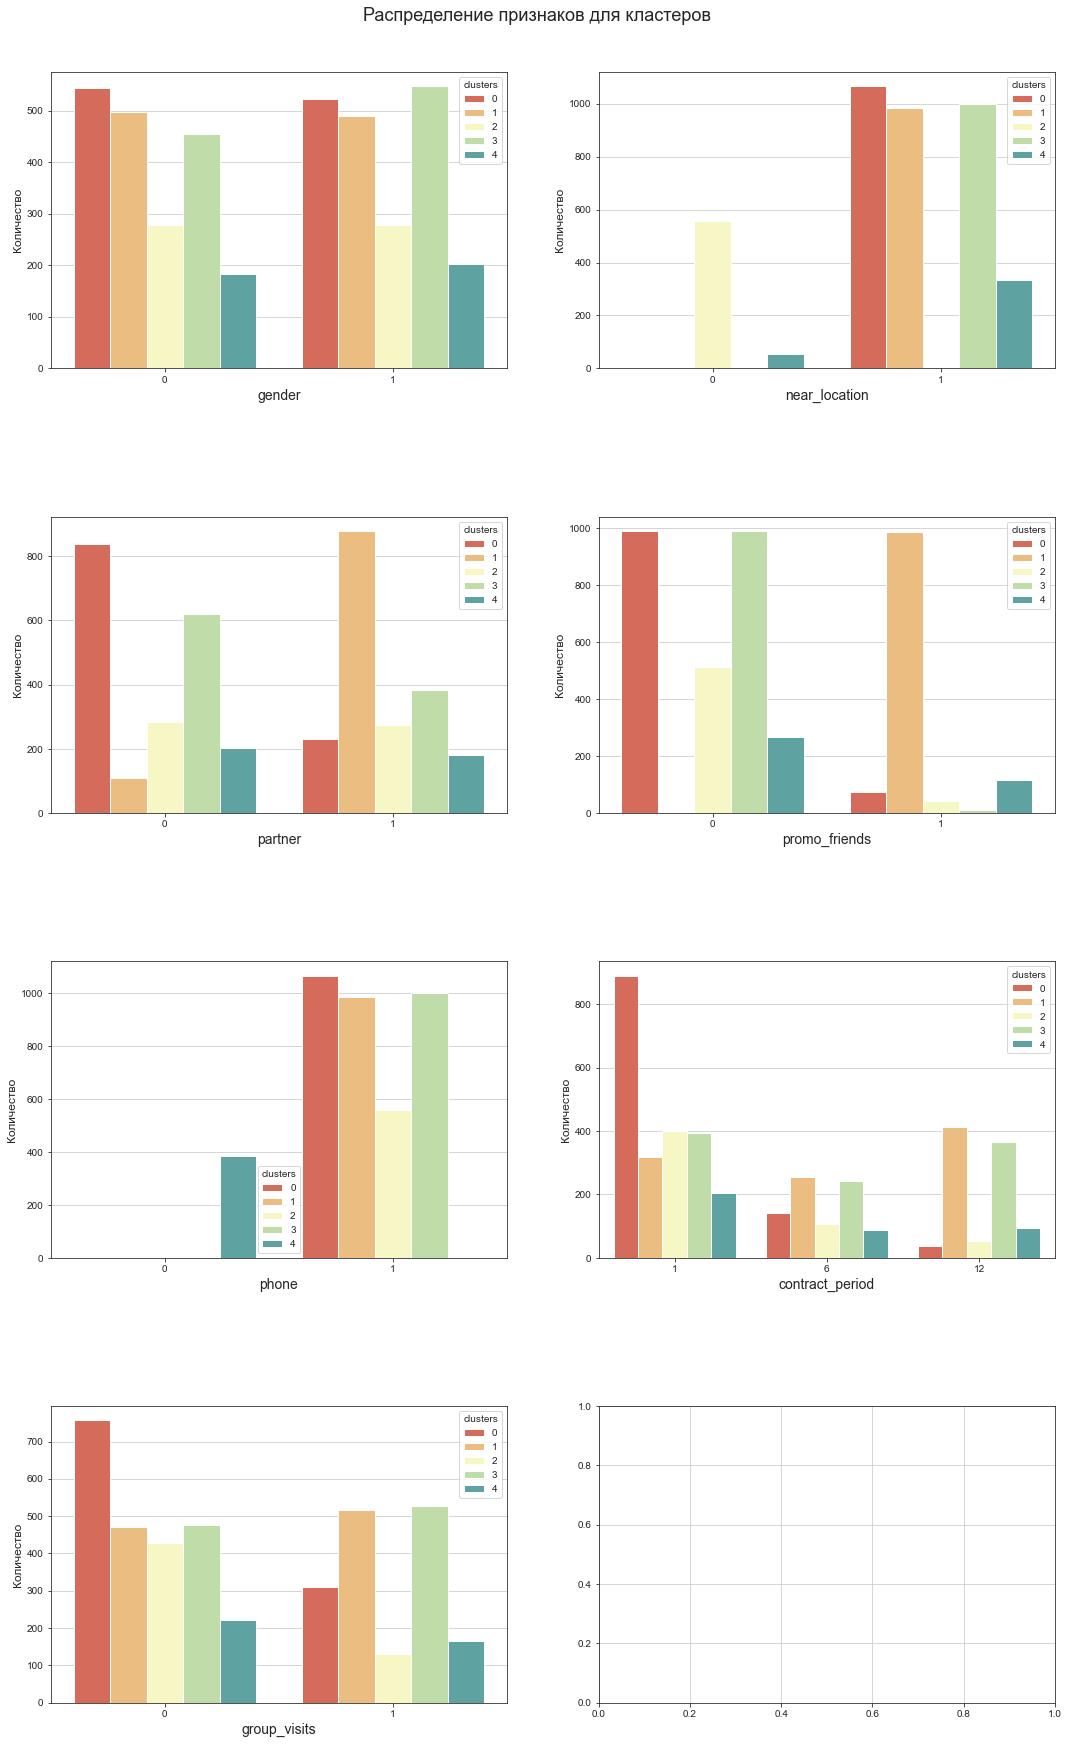

In [44]:
sns.set_style("ticks",{'axes.grid' : True})
fig, axs = plt.subplots(4, 2, figsize=(18, 30))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Распределение признаков для кластеров", fontsize=18, y=0.91)

for col, ax in zip(features_countplot, axs.ravel()):
    sns.countplot(data=df, x=df[col], hue='clusters', ax=ax, palette="Spectral")
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Количество', fontsize=12)
plt.show()

Данными проекта не опеределена приданлежнасть пола к метке. Предположим, что 0 - женщины, 1 - мужчины.

In [45]:
# посмотрим процент превышения доли мужчин в кластере 3
print('Женщин:', len(df.query('clusters == 3 and gender == 0')))
print('Мужчин', len(df.query('clusters == 3 and gender == 1')))
print('Доля гендерного различия: {:.0%}'.format(
    len(df.query('clusters == 3 and gender == 1')) / 
    len(df.query('clusters == 3 and gender == 0')) -
    1))

Женщин: 454
Мужчин 548
Доля гендерного различия: 21%


In [46]:
# посмотрим процент превышения доли мужчин в кластере 0
print('Женщин:', len(df.query('clusters == 0 and gender == 0')))
print('Мужчин', len(df.query('clusters == 0 and gender == 1')))
print('Доля гендерного различия: {:.0%}'.format(
    len(df.query('clusters == 0 and gender == 1')) / 
    len(df.query('clusters == 0 and gender == 0')) -
    1))

Женщин: 545
Мужчин 522
Доля гендерного различия: -4%


In [47]:
# посмотрим максимальный lifetime для кластера 3
df.query('clusters == 3')['lifetime'].max()

31

In [48]:
# посмотрим максимальную среднюю частоту посещений центра в неделю в кластере 1
df.query('clusters == 1')['avg_class_frequency_current_month'].max()

6.15

In [49]:
# посмотрим максимальную среднюю частоту посещений центра в неделю в кластере 1
df.query('clusters == 2')['avg_additional_charges_total'].max()

552.59

Построим графики для features_boxplot

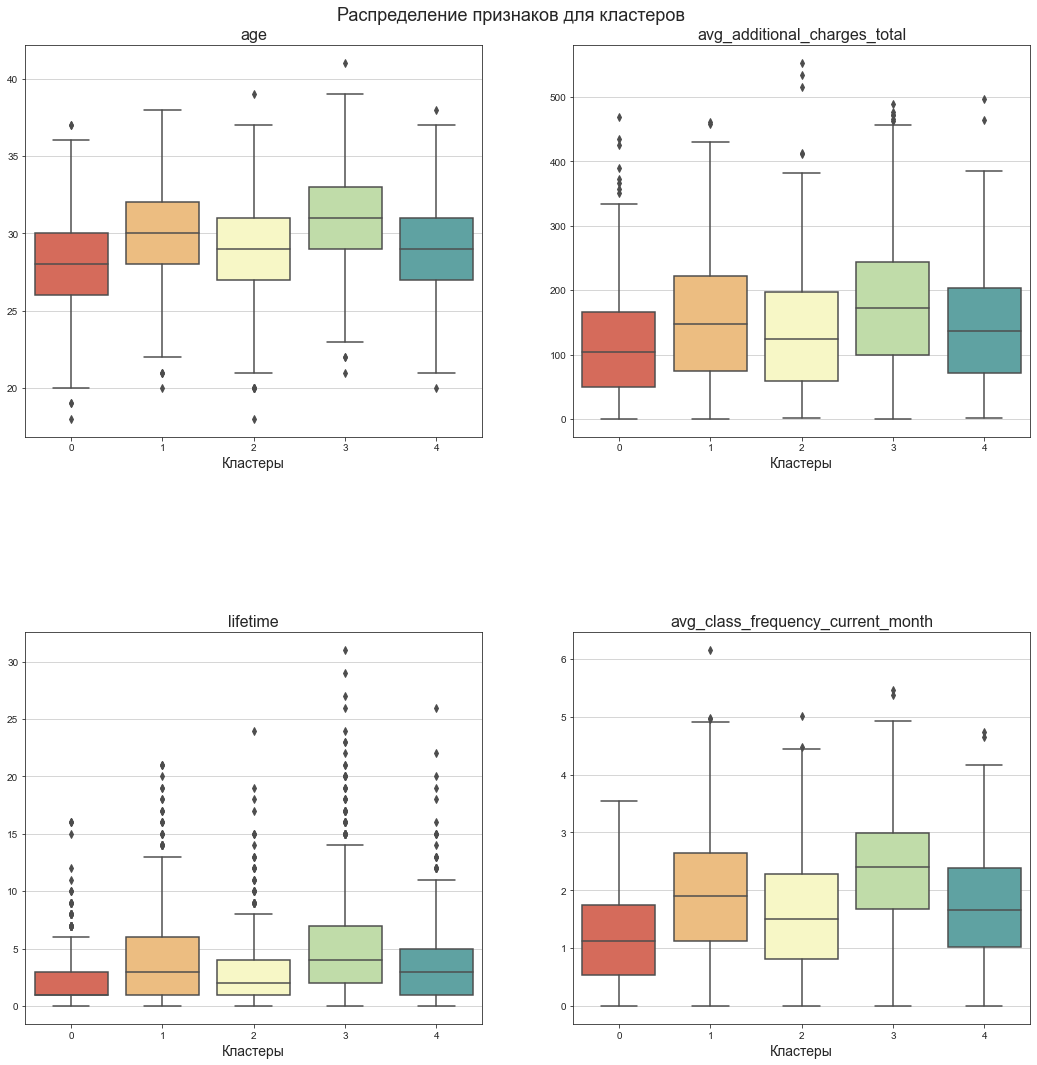

In [50]:
sns.set_style("ticks",{'axes.grid' : True})
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Распределение признаков для кластеров", fontsize=18, y=0.91)
for col, ax in zip(features_boxplot, axs.ravel()):
    sns.boxplot(x = df['clusters'], y = df[col], ax=ax, palette='Spectral')
    ax.set_xlabel('Кластеры', fontsize=14)
    ax.set_ylabel('')
    ax.set_title(col, fontsize=16)
plt.show()

**Вывод**

Графики распределения признаков для кластеров в общем подтвердили правильность ранее сделанных выводов, основанных на оценке клиентов по среднему значению признаков для кластеров. Но благодаря этим графикам мы выяснили некоторые особенности:

   1. В составе `кластера 3` мужчин на 21% больше, чем женщин, тогда как `кластер 0`, наоборот содержит в составке на 4% больше женщин.
   2. `кластер 1` больше всех приобретает абонемент на 12 месяцев. Возможно, это связано с тем, что это единственный кластер, максимально использующий возможности промо-акций. Возможно, промо-акции в основном проходят на покупку длительных абонементов - 12 мес.
   3. Максимальный чек за дополнительные услуги в фитнес-центре был зафиксирован в `кластере 2` - 552 руб.
   4. Самый постоянный и лояльный по отношению к центру - `кластер 3` - lifetime доходит до 31 месяца. Меньше всех ходят клиенты из `кластера 0` - не более 16 месяцев.
   5. Только в `кластере 1` есть столь ярые спортсмены, которые готовы посещать фитнес-центр в среднем до 6.15 раз в неделю.

### Доля оттока по кластерам

Посчитаем долю оттока для каждого кластера. Выявим надежные кластеры и кластеры, склонные к оттоку.

In [51]:
share_for_clusters = (
    df
    .query('churn == 1')
    .pivot_table(index='clusters', 
                 values='churn', 
                 aggfunc='count')
).rename(columns={'churn':'count'})

share_for_clusters['share_outflow'] = (
    share_for_clusters['count'] / 
    share_for_clusters['count'].sum()
).round(2)
share_for_clusters.sort_values(by='share_outflow', ascending=False)

,count,share_outflow
clusters,,
0,598,0.56
2,225,0.21
1,118,0.11
4,103,0.10
3,17,0.02


**Вывод**

Максимальный процент оттока - 56% - в `кластере 0` - самые молодые и, как оказалось, непостоянные клиенты. Также покидает фитнес-центр каждый пятый клиент из `кластера 2` - те, кто, видимо, изначально поторопился с покупкой абонемента при том, что не живет и не работает рядом фитнес-центром.
Предсказуемо, лидером по своему постоянству стал `кластер 3`- настоящие спортсмены - отток здесь не превышает 2%.

## Вывод и рекомендации

**В проекте были сделаны следующие шаги:**

   1. провели предобработку данных для качественного анализа: заменили типы данных, округлили значения, названия колонок привели к "хорошему стилю";
   2. провели разведочный анализ данных: построили гистограммы распределения признаков, рассчитали матрицу корреляций и построили корреляционную тепловую карту. Обнаружили мультиколлинеарность и удалили признаки, которые могли бы усложнить интерпретацию модели и ухудшить качество прогнозов. Тем самым обеспечили будущим моделям возможность более точно определить закономерности между признаками и повысить уровень предсказаний;
   3. выявили дисбаланс классов и подобрали оптимальную модель прогнозирования оттока клиентов с учетом дисбаланса.
   4. провели предварительную стандартизацию признаков для качественной кластеризации клиентов и выявили кластеры наиболее склонные к оттоку.
   
<hr>

**Результаты проделанной работы:**
<hr>

**1. Модель прогнозирования оттока клиентов**

Доля оттока клиентов в текущем месяце: 27%.

Для поставленной задачи подготовили две модели машинного обучения:

1. 'Логистическая регрессия'
2. 'Случайный лес'

Благодаря наличию дополнительных гиперпараметров у моделей машинного обучения, путем перебора в цикле нашли оптимальную модель, которая показала наиболее высокое значение F1 меры. Лучшей моделью прогнозирования оттока стала Логистическая регрессия: 

   `model_lr = LogisticRegression(random_state=999, solver='liblinear', class_weight='balanced')`

со следующими показателями качества предсказания:

   - F1-мера = 0.85
   - accuracy = 0.91
   - Recall = 0.95
   - Precision = 0.76
   
Выявили три наиболее важных признака для модели Логистической регрессии, влияющих на отток клиентов:

    1. avg_class_frequency_current_month - средняя частота посещений в неделю за предыдущий месяц,
    2. lifetime	 - продолжительсть посещений,
    3. group_visits - факт посещения групповых занятий.   
   
**2. Кластеризация клиентов** 

В результате кластеризации сформировали "портреты клиентов фитнес-центра":

   - **кластер 0** - "самые молодые" - живет/работает рядом с фитнес-центром, самый молодой кластер - средний возраст 27-28 лет, но при этом не столь продвинут - не пользуется скидками по промо-акциям, меньше всех тратит на дополнительные услуги, редко посещает групповые занятия, приобретает самый короткий абонемент и это самый редкий гость центра - увидеть его в центре можно всего 1 раз в неделю. Самый короткий lifetime - не более 16 месяцев. В тоже время это самый многочисленный кластер. 
   - **кластер 1** - "продуманный клиент" - это самый дальновидный клиент - он живет/работает поблизости, абонемент приобретает исключительно по промо-акциям или являясь сотрудником компании-партнера центра и на самый длительный период, но встретить в центре его можно в среднем не чаще 2 раз в неделю. Хотя только в этом кластере есть ярые спортсмены, которые готовы посещать фитнес-центр в среднем до 6.15 раз в неделю.
   - **кластер 2** - "спонтанная покупка" - клиент, который, видимо, поторопился с покупкой абонемента. Несмотря на то, что он приобретает абонемент в среднем на 3 месяца, в центр ходит редко и реже всех посещает групповые занятия. Это единственный кластер клиентов, которые не живут/не работают рядом с клубом.
   - **кластер 3** - "настоящий спортсмен" - это самая взрослая возрастная группа - в среднем 31 год - приобретают абонемент на длительный период и имеют самый высокий уровень посещаемости и самый высокий lifetime - 31 месяц. Безусловно и тратят на допуслуги больше остальных. В составе кластера доля мужчин превалирует на 21% над женщинами. Это второй по численности кластер. 
   - **кластер 4** - "золотая середина" - имеет средние показатели абсолютно по всем признакам, но этот клиент - инкогнито - он НИКОГДА не оставляет свой телефон. Это самый малочисленный кластер - всего 386 клиентов. 

Доля оттока по кластерам в текущем месяце:
   
   1. `кластер 0` - 56% - 598 клиентов,
   2. `кластер 1` - 11% - 118 клиентов,
   3. `кластер 2` - 21% - 225 клиентов,
   4. `кластер 3` - 2% - 17 клиентов,
   5. `кластер 4` - 10% - 103 клиента

<hr>

**Рекомендации:**
<hr>

Для предсказания факта ухода клиентов из фитнес-центра рекомендуем модель "Логистической регрессии", которая показала высокий уровень предсказаний за счет высокой точности (0.76), а также показывает долю правильных ответов на уровне 91%. Модель находит большую часть ушедших клиентов на валидационной выборке (полнота = 0.95).

`LogisticRegression(random_state=999, solver='liblinear', class_weight='balanced')`

В первую очередь,  рекомендуем отделу маркетинга провести анкетирование клиентов и понять истинные потребности и интересы каждого кластера. На основании анкетирования предложить виды дополнительных занятий в клубе, направленных на удовлетворение интересов каждого кластера. Особое внимание уделить "кластеру 0" - самые молодые клиенты, так как по численности в нем заложен большой потенциал, нужно только умело удержать его в фитнес-центре. Через призму понимания их истинных потребностей расширить или видоизменить дополнительные услуги центра, составить удобное расписание, мотивирующие клиентов чаще посещать дополнительные занятия и больше времени и денег тратить в центре. "Кластеру 0" предложить варианты приобретения абонемента минимум на 3 месяца на "молодых условиях", чтобы как можно дольше удерживать его внимание для формирования привычки похода в спорт-клуб и достижения минимальных спортивных результатов. Чем лучше будет понята потребность клиентом, чем уютнее и интереснее будет проводить время в фитнес-центре, тем меньше будет отток. 